In [1]:
#-- IMPORTING MODULES --
import numpy as np
import mpmath as mp

import math
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.optimize import fsolve
import scipy.misc
from scipy.misc import derivative
import scipy.interpolate
from scipy.interpolate import griddata
from scipy.integrate import quad, trapz, cumtrapz, romberg, fixed_quad, odeint, ode
from scipy import linalg
from numpy.linalg import inv
from scipy.special import gamma, hyp1f1
from scipy.interpolate import interp1d
import time

#Atropy cosmology modules
import astropy.units as astrou
from astropy.cosmology import Planck18_arXiv_v2 as cosmo
from astropy.cosmology import z_at_value
import pdfCBC as pm 
from pdfCBC import inverse_transf_sampling


# Import mycode
import sys
path = '/Users/feixu/OneDrive - The University of Chicago/Documents/Research'
sys.path.append(path+'/mycode/')
sys.path.append(path+'/lensingFei/')
import constantfei 
from optical_depthfei import *
from RBBH_fei import *
import gw 
from MC_fei import *


#Export results folder
import sys
dir_base=sys.path[0]
dir_out1=dir_base+"/plots_py_gw_lensing/"
dir_out2=dir_base+"/fits_py_gw_lensing/"

ModuleNotFoundError: No module named 'pdfCBC'

In [2]:
start = time.time()
MCfei(161e3)
end = time.time()
print(end-start)

/Users/feixu/OneDrive - The University of Chicago/Documents/Research/GW_len/github/MC_fei.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda s: pdf(s), 0, x)[0]
/Users/feixu/OneDrive - The University of Chicago/Documents/Research/GW_len/github/MC_fei.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda s: pdf(s), 0, x)[0]


KeyboardInterrupt: 

In [2]:
area = integrate.quad(lambda x: dR_dz_org(x), 0, 8)[0]
def dR_dz_org_PDF(z):
    return dR_dz_org(z)/area

dR_dz_org_PDF = np.vectorize(dR_dz_org_PDF)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


In [3]:
z_rand_arr = ITM(dR_dz_org_PDF, [0, 10], int(1e7))
print(z_rand_arr)

/Users/feixu/OneDrive - The University of Chicago/Documents/Research/GW_len/github/MC_fei.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda s: pdf(s), 0, x)[0]
/Users/feixu/OneDrive - The University of Chicago/Documents/Research/GW_len/github/MC_fei.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda s: pdf(s), 0, x)[0]


[1.90685016 2.16522269 2.95891096 ... 1.71911502 3.88210522 2.05368716]


In [4]:
sigma_starm = 161e3
taurand_arr = tau_spec(z_rand_arr, sigma_starm)

randnum = np.random.uniform(0, 1, int(1e7))
zrandl = z_rand_arr[np.where(taurand_arr > randnum)]

In [7]:
MCfei = np.vectorize(MCfei)

In [20]:
result_list = []
for zrand0 in zrandl:
    result_list.append(MCfei(zrand0, sigma_starm))

Source: [36.06792065] 26.55605909820895 3.119952635346461
Galaxy q: 0.6091658209266487
Source: [26.85464603] 14.291765421087595 1.2597067563626474
Galaxy q: 0.673841291965765
Source: [30.80976173] 29.389853702145274 2.4410679863620985
Galaxy q: 0.5175898991334295
Source: [23.85891212] 14.674773378968103 3.679224518740619
Galaxy q: 0.5380911714512338
Source: [9.57606869] 5.035418005345937 1.6831343105327277
Galaxy q: 0.24899676804448334
Source: [36.38110536] 35.758775647678355 5.499296300132842
Galaxy q: 0.7237140435121696
Source: [16.3505609] 9.621362522352115 1.7919765355561594
Galaxy q: 0.27955881926931025


//anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Source: [19.21642389] 5.672560373414775 3.4716035065366024
Galaxy q: 0.5439538231700701
Source: [12.04521213] 12.024012126463171 4.238733142762634
Galaxy q: 0.5190801050533018
Source: [21.10714942] 18.436615101675123 1.8285426156010505
Galaxy q: 0.418632129829154


//anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Source: [26.54753161] 14.768183079682661 2.4322980958948333
Galaxy q: 0.2690570183657033
Source: [22.57387899] 14.787946355397587 3.1703170236956915
Galaxy q: 0.8825306819171912
Source: [12.87693653] 6.975432725502618 3.7412313352574715
Galaxy q: 0.8713123644503793
Source: [39.62193063] 15.869749442396335 2.185304653526386
Galaxy q: 0.4444234227727001
Source: [14.70610417] 7.720586686682267 1.8276940239072683
Galaxy q: 0.6785829470647811
Source: [22.41712683] 17.024776101432252 2.0802366152043263
Galaxy q: 0.8116258862084245
Source: [33.12552667] 8.31747573638368 2.8375606834733342
Galaxy q: 0.5507705391923957
Source: [18.39063453] 9.03424757976508 2.601068155240594
Galaxy q: 0.29811284644595437
Source: [9.33773475] 6.295332743951228 1.8964441512923287
Galaxy q: 0.5282468371285836
Source: [31.369596] 23.38988339608882 2.3423266142795662
Galaxy q: 0.4151831573260256
Source: [13.17795634] 10.385040389701398 3.3952956244809633
Galaxy q: 0.44178355556314275
Source: [12.05168628] 6.15015232

Galaxy q: 0.4441549983633015
Source: [18.49982441] 9.81612492202536 4.212666894169826
Galaxy q: 0.45770601932090893
Source: [17.81512091] 11.620646849250207 2.8151983793164423
Galaxy q: 0.456871336676842
Source: [10.14257119] 5.343021496192603 2.9257756682317577
Galaxy q: 0.3136974340060277
Source: [13.34233891] 5.84178851835285 4.455397999978491
Galaxy q: 0.32590038811966404
Source: [21.84292881] 8.321166617325275 3.511362881487382
Galaxy q: 0.6768244514782016
Source: [19.3329894] 16.832341113525402 3.1933061473004876
Galaxy q: 0.7867928741256316
Source: [21.36926296] 10.884099956345974 2.5709597019907253
Galaxy q: 0.4619984772005523
Source: [18.19123386] 14.244460520596807 3.7707429054477006
Galaxy q: 0.2584936694715181
Source: [32.32815325] 27.668174704510196 1.9432897943256249
Galaxy q: 0.6476853279249633
Source: [9.09302282] 8.624257950289419 1.9533497211657675
Galaxy q: 0.48054172843362564
Source: [9.3783704] 6.015034788983785 1.751683180971225
Galaxy q: 0.47013478841231204
Sourc

Galaxy q: 0.5134048998405775
Source: [7.36239159] 5.776085296774384 1.5492131882734177
Galaxy q: 0.7900552930181919
Source: [7.64422232] 7.145922771765326 4.990018869085911
Galaxy q: 0.22572068668215028
Source: [22.79125342] 19.206987113280483 5.660379787360355
Galaxy q: 0.7398567601488584
Source: [9.50707002] 6.627484757769754 2.8081522749507917
Galaxy q: 0.23420286375510457
Source: [21.07340431] 11.961328763315814 3.0909651081863827
Galaxy q: 0.9100172641747315
Source: [22.40571361] 18.34060945396284 5.272032013538159
Galaxy q: 0.8650032198137445
Source: [5.61521542] 5.611594079824474 3.5506809267296284
Galaxy q: 0.5548205647854528
Source: [20.80719443] 20.050421174642707 2.4266343576616434
Galaxy q: 0.931820516409213
Source: [6.85281381] 6.166374678407934 1.7625719298613944
Galaxy q: 0.6838152893560501
Source: [15.76224207] 6.4049676101126245 2.9238049836704088
Galaxy q: 0.575969110172465
Source: [38.48795253] 36.956424102508684 2.1467877937185005
Galaxy q: 0.6830375795249749
Source

Galaxy q: 0.7807289068766228
Source: [35.76494354] 22.402430234929934 4.436750044810779
Galaxy q: 0.4169301431376131
Source: [36.73472211] 13.594372818774033 2.651166525748309
Galaxy q: 0.4141306658317154
Source: [8.33630348] 7.543875475477359 2.156567164196417
Galaxy q: 0.28159008619515224
Source: [13.68855806] 13.295812758815106 5.220191630211823
Galaxy q: 0.32132471376071225
Source: [6.96031231] 5.199584676222978 1.5914877135871786
Galaxy q: 0.4746971789633979
Source: [9.7342994] 9.65393101981 3.390819989149603
Galaxy q: 0.7502915778461672
Source: [11.79885196] 10.65708587147035 2.0389409606861113
Galaxy q: 0.4445638614101237
Source: [26.24841695] 20.658984654799262 5.54192997202229
Galaxy q: 0.46781911018573874
Source: [10.79781736] 9.363576030918864 2.629259430169221
Galaxy q: 0.5338404129644065
Source: [12.62139552] 9.597944446066817 2.474026262750767
Galaxy q: 0.7220013233545975
Source: [10.6326056] 5.017063186945294 1.9012095028729548
Galaxy q: 0.5701397705284856
Source: [33.07

Galaxy q: 0.9954130035442639
Source: [16.61088705] 7.312237602966714 2.5593113127744376
Galaxy q: 0.452870767542774
Source: [24.671789] 21.59233119741706 4.576056026867491
Galaxy q: 0.7308215959107341
Source: [41.25376104] 15.509823968534262 3.5805508934974224
Galaxy q: 0.6184419362443749
Source: [7.77206152] 7.118377109440471 2.946293587439882
Galaxy q: 0.40076020407866175
Source: [11.8411809] 9.974119057424756 3.2150771719649747
Galaxy q: 0.7659951853728288
Source: [6.29433774] 5.52876631765173 2.295233134224975
Galaxy q: 0.745818584751301
Source: [36.3149642] 28.608934193409038 1.837635773970517
Galaxy q: 0.6948526483443926
Source: [9.96019249] 8.919379551828035 5.656537267341526
Galaxy q: 0.3799053421079207
Source: [40.89087499] 27.415265264213797 4.5590439328001615
Galaxy q: 0.8984728608578236
Source: [31.9826674] 27.617557368924246 3.1775337316645778
Galaxy q: 0.4923417025553175
Source: [21.2836982] 13.171248573992923 2.0918917539400455
Galaxy q: 0.33137877559864515
Source: [40.8

Galaxy q: 0.7613115409635509
Source: [17.34402868] 6.003519059315526 1.8370408780159362
Galaxy q: 0.4005560517057436
Source: [32.41750962] 26.932730572110135 3.483650373972836
Galaxy q: 0.7819502981450122
Source: [5.46538381] 5.015901744568197 2.2739389023293772
Galaxy q: 0.7603003631132792
Source: [37.23040507] 17.84115405153888 2.2556652552781102
Galaxy q: 0.35000078492768716
Source: [16.77398542] 12.274802437954184 2.096536982371038
Galaxy q: 0.7498090866000902
Source: [17.15104008] 11.38277090292211 1.7114688647945946
Galaxy q: 0.4903710113654165
Source: [40.9463894] 37.22721082820057 6.426737942505117
Galaxy q: 0.24570087313454114
Source: [28.20500734] 27.734836023894673 5.984662646543105
Galaxy q: 0.9955332136462435
Source: [14.81783905] 11.888565056428744 4.416227772596738
Galaxy q: 0.7427254331180677
Source: [11.80284424] 11.34560169304251 3.742612681361596
Galaxy q: 0.7570724376415041
Source: [5.54515682] 5.093633520490249 5.759590733917588
Galaxy q: 0.37644662543239316
Source

Galaxy q: 0.4157512312959606
Source: [9.20961983] 5.9632715046987625 5.836790293588926
Galaxy q: 0.45879482640278935
Source: [25.76454608] 23.82695154835896 1.6530125804110842
Galaxy q: 0.3858805579271515
Source: [16.30189714] 5.68881372967885 3.7881736031861504
Galaxy q: 0.6240601953159545
Source: [7.13494608] 6.227072305972737 3.2653854428850715
Galaxy q: 0.6415249437604436
Source: [7.12823514] 5.293114813815501 2.167891713440969
Galaxy q: 0.612786304234339
Source: [34.49547161] 6.845873995400286 2.057484981588064
Galaxy q: 0.299313985732343
Source: [41.441961] 36.26265309052836 5.768287467840546
Galaxy q: 0.5711227170224369
Source: [6.37342118] 5.820050906203632 1.0972755585732068
Galaxy q: 0.5348199450872703
Source: [32.86835755] 24.928297942331334 5.0684992517961085
Galaxy q: 0.837068781407653
Source: [9.9323741] 8.576814945624633 3.6148266125206865
Galaxy q: 0.9814131399907616
Source: [34.15907871] 10.36516037967224 3.632938534276555
Galaxy q: 0.6095216259425569
Source: [10.57233

Galaxy q: 0.39433767611862336
Source: [35.66069437] 27.675650455767556 2.2845043025909852
Galaxy q: 0.6023267391016214
Source: [9.70813384] 7.728987165855774 2.4659819508851357
Galaxy q: 0.547273856203121
Source: [15.88198258] 10.446883132600258 2.695682261311055
Galaxy q: 0.2581783069146891
Source: [17.46643292] 5.788881081566498 4.8176239633343
Galaxy q: 0.44345327793609546
Source: [6.49831367] 5.676198142726226 4.046491768590976
Galaxy q: 0.5180694677299381
Source: [27.0531961] 18.153004587155486 4.5179627160888876
Galaxy q: 0.7067890447091989
Source: [7.38110037] 6.794135305568757 4.844490457546415
Galaxy q: 0.6844145782881164
Source: [15.74487925] 10.201243444020534 2.7476124717248807
Galaxy q: 0.46614672646140654
Source: [25.53525353] 24.689217978879633 3.6710714221386773
Galaxy q: 0.486947834805062
Source: [17.31495143] 6.696721507988484 6.444046878675918
Galaxy q: 0.4422783473022728
Source: [8.1124082] 5.669413810440879 4.4212513317784685
Galaxy q: 0.4026386665917865
Source: [3

Galaxy q: 0.48679810388916056
Source: [14.49937995] 7.895929324732334 3.059322788806068
Galaxy q: 0.3960621378291195
Source: [30.803513] 17.23595383058489 2.833928486951298
Galaxy q: 0.8965939711639752
Source: [32.31123976] 13.228975647131037 2.737504268391082
Galaxy q: 0.6263597892567859
Source: [9.94731148] 9.621266133294576 4.759584743434947
Galaxy q: 0.7238476357333453
Source: [7.13453399] 5.662838616220072 3.528490333699174
Galaxy q: 0.6174468788456526
Source: [19.39228075] 16.224984693422606 2.7920759740025494
Galaxy q: 0.24416313968885084
Source: [8.12375445] 5.078945977047522 2.3615480360934966
Galaxy q: 0.6782443926246793
Source: [24.16673574] 19.472649093137296 1.2214296592513576
Galaxy q: 0.5079983352519691
Source: [21.97919372] 19.08406573515688 4.6702949548696955
Galaxy q: 0.5977396140037197
Source: [10.37128625] 6.940193796171485 1.770323217756644
Galaxy q: 0.5073499481577722
Source: [28.24148848] 18.23796993646369 2.9620940703276117
Galaxy q: 0.8059121251811335
Source: [

Galaxy q: 0.7966677471272832
Source: [20.54591601] 7.883525178537778 4.3985302506106745
Galaxy q: 0.5070603755467642
Source: [7.19454646] 5.422150144699771 3.727317777822041
Galaxy q: 0.22897615082681289
Source: [33.74332227] 14.086223745920753 2.3548019998274765
Galaxy q: 0.36767031943530537
Source: [10.72537767] 9.10455856418188 3.4917506315522036
Galaxy q: 0.3680196307423327
Source: [9.04672839] 5.97803405253425 1.9693455860779738
Galaxy q: 0.7383991298958381
Source: [11.83595188] 8.934443738128639 1.588577916812388
Galaxy q: 0.30307988897826454
Source: [8.17440719] 7.082352468857955 1.9338238116491333
Galaxy q: 0.4194466640210035
Source: [18.0499801] 12.651029368056225 2.2900947222557284
Galaxy q: 0.9745679082796541
Source: [8.03038771] 5.584802092517892 5.579114102690599
Galaxy q: 0.6930395635377873
Source: [24.72986619] 20.461546259514748 3.176206727681652
Galaxy q: 0.5490823875408484
Source: [10.07555569] 7.165112484427645 1.790302845035012
Galaxy q: 0.6203278995884122
Source: [

Galaxy q: 0.31382792319555153
Source: [23.18607872] 9.196462553458339 5.49997128167287
Galaxy q: 0.39548526517499494
Source: [41.47777858] 37.917565100326165 1.8800251077577812
Galaxy q: 0.6859247403276637
Source: [24.15308466] 23.10347632129061 1.9639313156354818
Galaxy q: 0.26792686915472885
Source: [24.72882981] 10.819812384915718 3.268978100935927
Galaxy q: 0.7391318467471194
Source: [18.22017686] 16.861541025069947 5.578907224213851
Galaxy q: 0.3663182811315224
Source: [33.5298641] 30.325421324638448 2.9228680356751853
Galaxy q: 0.6667977495602645
Source: [27.80297215] 11.010715784544402 3.2448600181902965
Galaxy q: 0.42048594766770053
Source: [27.98211732] 8.446593963577188 2.2485665072780345
Galaxy q: 0.8353653835936726
Source: [24.62249792] 21.695085276847895 5.901672696567788
Galaxy q: 0.9689139038422723
Source: [9.4301012] 8.304663454381357 4.707886973489168
Galaxy q: 0.2336971608829166
Source: [28.82590724] 12.30342680667054 4.535268664673924
Galaxy q: 0.6950937749978204
Sou

Galaxy q: 0.46651586778520704
Source: [12.09752141] 9.453940241724405 4.578987716819766
Galaxy q: 0.28906119297697797
Source: [11.09331396] 7.95582188683383 5.823690379938199
Galaxy q: 0.46661207702244567
Source: [19.67203992] 7.002453747326114 1.115072329094975
Galaxy q: 0.5328275090769801
Source: [10.88202437] 5.92397850039761 3.1467903478022605
Galaxy q: 0.7540128871982843
Source: [31.20252142] 10.558951481334518 2.638001084556655
Galaxy q: 0.37866223022361634
Source: [7.00038833] 5.187018794072928 1.676583323254885
Galaxy q: 0.26893817782297946
Source: [7.37558017] 5.815498189864232 3.533530168466837
Galaxy q: 0.435438173062629
Source: [18.51830455] 16.016237892378072 2.887918286912267
Galaxy q: 0.4022155729772532
Source: [32.0909293] 30.853317690964076 2.2931456856822887
Galaxy q: 0.5777864669913502
Source: [30.29424536] 18.414311765178404 2.690458738534198
Galaxy q: 0.7015988693297953
Source: [22.71169921] 15.990127306762698 1.3318956644086364
Galaxy q: 0.6159744550866333
Source:

Galaxy q: 0.5287559815432574
Source: [21.48593939] 10.556914421872225 2.8511223872456952
Galaxy q: 0.5131863481152168
Source: [34.6876577] 17.456146599847656 4.553908883834628
Galaxy q: 0.30004704896171586
Source: [29.74664521] 23.645194490851896 2.3194164969396573
Galaxy q: 0.7472802282847912
Source: [20.98072635] 18.640110672641356 4.122303726021088
Galaxy q: 0.5718775885068185
Source: [40.31719488] 32.54758566284777 2.2003083873041396
Galaxy q: 0.6113977844315663
Source: [34.97326731] 15.596647277711561 3.423082961947328
Galaxy q: 0.48187621551319026
Source: [19.15311413] 11.206849536001863 2.662714498262389
Galaxy q: 0.5524112458281787
Source: [39.88875085] 27.531577026250513 5.463430696289412
Galaxy q: 0.7574550491478597
Source: [21.64988618] 18.25944226612684 3.5996926668587528
Galaxy q: 0.32978782136956675
Source: [37.42407394] 15.627028973152065 3.0955758438012126
Galaxy q: 0.8534258473573304
Source: [27.14602222] 23.212987241128843 1.689956404586131
Galaxy q: 0.372758015829013

Galaxy q: 0.22371714723409464
Source: [16.85007699] 14.853320870262852 3.10117569886707
Galaxy q: 0.5117455703125044
Source: [5.47887988] 5.461190894781968 3.116547709069609
Galaxy q: 0.6882295962205575
Source: [28.06276074] 18.44878261819924 2.862949301006838
Galaxy q: 0.6512526114572859
Source: [37.59515221] 19.36551985421775 2.9724575701097775
Galaxy q: 0.25295415310715286
Source: [16.96295012] 13.96281142890679 1.3184730933248698
Galaxy q: 0.2286426838590665
Source: [39.45513622] 27.437399902146968 2.200670114724086
Galaxy q: 0.5688220683915598
Source: [37.49450436] 23.499523966090162 2.771370790289404
Galaxy q: 0.5676491369576049
Source: [25.30649945] 18.485404238453008 4.059820094079592
Galaxy q: 0.7598151970261235
Source: [7.68627152] 7.147420927119194 6.33527233743899
Galaxy q: 0.6584717619437825
Source: [13.08318712] 9.063031055903998 2.5968072110482616
Galaxy q: 0.4555254895247467
Source: [29.21645804] 28.36663746557453 6.606161352748275
Galaxy q: 0.4430839983984407
Source: [

Galaxy q: 0.6394138103895295
Source: [22.23939153] 18.012077093374785 3.368617141515051
Galaxy q: 0.4449969300233104
Source: [15.49447188] 15.478956293512422 3.4072524658054957
Galaxy q: 0.658501387754205
Source: [23.20779769] 21.024377226036805 2.9654398496542633
Galaxy q: 0.7700023353480305
Source: [20.68895887] 6.330286107170243 3.25570001516704
Galaxy q: 0.5184271791364559
Source: [37.53338214] 12.941581913808953 2.9165481101543937
Galaxy q: 0.7775737776557697
Source: [13.13684623] 5.716768344295497 4.221314094226527
Galaxy q: 0.6006223725924976
Source: [20.0885576] 5.824711591873671 1.9820749412514989
Galaxy q: 0.4740513836957442
Source: [37.14153962] 18.10670033132603 2.9411762148277196
Galaxy q: 0.29052209300917453
Source: [35.96991148] 17.06100685160662 3.448708338011068
Galaxy q: 0.8930628817715592
Source: [30.73388129] 20.077001960537906 2.892920304500851
Galaxy q: 0.816474519291901
Source: [20.01999908] 11.574341982364441 1.5443423209901146
Galaxy q: 0.42375897501339965
Sour

Galaxy q: 0.37850786260820735
Source: [15.87770671] 11.918588506968057 3.0815043775372946
Galaxy q: 0.6958642541661884
Source: [28.77597716] 25.921560244888905 1.6963036612645932
Galaxy q: 0.20259143122601264
Source: [37.80894578] 8.44281005096437 2.316263374113079
Galaxy q: 0.7042679915922383
Source: [14.2494582] 6.197491650115515 3.7620175132498
Galaxy q: 0.3706665380970582
Source: [31.95460896] 19.798549480772444 2.991973032303404
Galaxy q: 0.5832635736236982
Source: [14.48349137] 8.739159614357003 1.2969553671650609
Galaxy q: 0.5018551034715104
Source: [7.78819562] 5.3991987182596555 4.122225972753885
Galaxy q: 0.5132035624757323
Source: [33.91549378] 11.92030363315698 3.0392793854175544
Galaxy q: 0.4177484332046044
Source: [11.31368061] 6.71418880712972 3.553787496940033
Galaxy q: 0.551274518867664
Source: [27.79428449] 22.37226723176333 3.161852483569353
Galaxy q: 0.6286093576993752
Source: [16.13087953] 11.589642275866144 2.86507185300915
Galaxy q: 0.32074875177984774
Source: [5

Galaxy q: 0.8490776547523499
Source: [19.03543976] 9.677946988780107 3.7501652174898297
Galaxy q: 0.644837328148294
Source: [11.87143753] 10.495437158429997 3.4719492260146905
Galaxy q: 0.22254036410034395
Source: [10.15537241] 8.077327285556798 2.9546330155663783
Galaxy q: 0.24856930631330665
Source: [33.12324456] 6.476788338818791 2.4855750212626386
Galaxy q: 0.8713893821235764
Source: [40.95110102] 12.338457115012453 5.118414653094946
Galaxy q: 0.5932297196300151
Source: [28.81891199] 15.047243527445634 3.360952775185238
Galaxy q: 0.2850219833012082
Source: [41.50577793] 6.243593939294837 2.116291759504316
Galaxy q: 0.7850832795759741
Source: [16.3777855] 11.68621336397425 4.148667814605176
Galaxy q: 0.29554435814279145
Source: [14.12763713] 5.927147498324849 3.7490705461838654
Galaxy q: 0.4473872285575502
Source: [28.67016498] 5.985122013590537 2.7192488452915002
Galaxy q: 0.6805080458311421
Source: [23.10979486] 21.628860497108267 3.8298225485008666
Galaxy q: 0.8465294385846115
So

Galaxy q: 0.5501332670547204
Source: [26.94710884] 19.831663339805992 1.9209153565960841
Galaxy q: 0.4650272959001066
Source: [37.09361766] 6.243809690409874 2.0827289090600134
Galaxy q: 0.5346785489020498
Source: [9.38661263] 7.576524319190476 4.641889482280545
Galaxy q: 0.7439451759085646
Source: [27.60026856] 20.25533489211776 4.7203324011121195
Galaxy q: 0.5921488843402817
Source: [37.22159251] 35.07517040991986 1.7194026366497825
Galaxy q: 0.38551937291857197
Source: [15.91342156] 7.69949521248993 3.5977794895114794
Galaxy q: 0.39099837781641766
Source: [34.34148917] 18.271110690947353 2.873458603154948
Galaxy q: 0.6694708230514611
Source: [20.6515227] 16.27078478953616 3.3433675071876228
Galaxy q: 0.6124005429926852
Source: [13.93503166] 8.038445851452238 3.6358843600797393
Galaxy q: 0.6063927500059965
Source: [25.75818318] 21.51943840481941 3.5216884910191326
Galaxy q: 0.6964041566306811
Source: [38.78533342] 31.91361770964456 2.475244208083795
Galaxy q: 0.5610814641382749
Sourc

Galaxy q: 0.7209960701390832
Source: [28.53186857] 13.242578918514857 4.755081838419284
Galaxy q: 0.631074049629924
Source: [5.24877102] 5.033171187385292 2.3769387692289423
Galaxy q: 0.4501943129507452
Source: [5.12581569] 5.000901948679809 1.6074049367408563
Galaxy q: 0.2804188315882358
Source: [29.55799124] 13.023640923222898 2.673196210204727
Galaxy q: 0.34582649180506897
Source: [20.03199683] 9.35822536769454 3.385091639555099
Galaxy q: 0.26347724681388074
Source: [18.03711426] 7.440438233240275 1.6252235427278245
Galaxy q: 0.8081501610116517
Source: [21.27050742] 9.660240901485338 2.6774109155490247
Galaxy q: 0.5423453484671812
Source: [35.98147447] 23.02539305399156 3.1269956292941266
Galaxy q: 0.5636950665627376
Source: [10.5842911] 7.13841455187153 2.0076553952420877
Galaxy q: 0.8523624450196413
Source: [36.74376965] 25.14545448810835 1.7596083600538963
Galaxy q: 0.5450600645427648
Source: [11.37680042] 8.942704363939182 3.5882337261670094
Galaxy q: 0.8991733666632462
Source: 

Galaxy q: 0.8113124291887474
Source: [6.18552624] 5.978842371709355 3.907280291065292
Galaxy q: 0.23752143803009595
Source: [31.12376172] 11.744357863754605 2.085139825720152
Galaxy q: 0.8359369822597333
Source: [33.86854036] 28.649968166571334 5.153598743041205
Galaxy q: 0.7979618268834017
Source: [15.20781291] 6.128374855113381 3.256896052078815
Galaxy q: 0.4965549962319442
Source: [35.91759426] 9.501981310705041 3.529858269570258
Galaxy q: 0.45707920562648785
Source: [24.9929091] 9.816980441241421 2.9242994803487625
Galaxy q: 0.2105508382398672
Source: [8.71498888] 7.093104073288192 5.522916997278804
Galaxy q: 0.29110475905593924
Source: [25.66883741] 13.254114990979087 4.254553037140228
Galaxy q: 0.6570272459140447
Source: [30.58733656] 8.81214638793259 4.400145465223661
Galaxy q: 0.27807962880607584
Source: [30.51547668] 12.661619376043877 3.566793657030847
Galaxy q: 0.4723486033878084
Source: [38.0625119] 31.981509452685607 4.202626629454904
Galaxy q: 0.5584266840201781
Source: [

Galaxy q: 0.3219415180487727
Source: [7.72143037] 6.183010930475508 4.485547946468872
Galaxy q: 0.49485025397378024
Source: [25.08931952] 17.8788960667651 1.4870079438369028
Galaxy q: 0.6781763089244399
Source: [13.55766744] 8.676848533831292 3.34753453089856
Galaxy q: 0.7879367103129739
Source: [12.10295584] 7.782605748517748 4.734859648567994
Galaxy q: 0.35260155362393664
Source: [15.2560214] 10.649775343828097 2.17175034186213
Galaxy q: 0.8725994279266516
Source: [10.39515856] 9.554963271176112 2.316844021467383
Galaxy q: 0.7054256493027409
Source: [11.11728829] 7.184007578875517 2.5095153768721064
Galaxy q: 0.2317721576624321
Source: [18.70944603] 6.7886627619710325 2.734361221407844
Galaxy q: 0.8258041537224907
Source: [27.14913455] 20.48213356825483 1.9141164066356309
Galaxy q: 0.3620907758872939
Source: [10.48238399] 8.881546627829463 3.9409109299664187
Galaxy q: 0.31577504301897075
Source: [37.70073639] 23.77994735723036 2.7984370005642236
Galaxy q: 0.5221409482332741
Source: [

Galaxy q: 0.9109844780852194
Source: [21.90039831] 9.51570133706635 3.5789899657045106
Galaxy q: 0.358745788637548
Source: [11.17627701] 8.1787625170131 2.0367740684540525
Galaxy q: 0.6536660224044275
Source: [9.10622734] 8.109269851973893 4.59517028047219
Galaxy q: 0.39131097145540994
Source: [6.84246625] 5.036557543185181 4.578802396739851
Galaxy q: 0.6047386191825339
Source: [25.91699366] 20.64514508729079 3.461668544172725
Galaxy q: 0.6841524274130264
Source: [34.20246066] 8.784114999216904 1.3124289186820064
Galaxy q: 0.5155020817914998
Source: [24.27597443] 11.296327880665654 1.5846024561975365
Galaxy q: 0.5984989020585609
Source: [36.94307687] 34.636316676132154 1.860202993369359
Galaxy q: 0.6186289578595157
Source: [6.57393141] 6.097927055277757 3.5188268319626714
Galaxy q: 0.3223224981371916
Source: [14.61368717] 8.276389020624942 5.902569288468847
Galaxy q: 0.7964145866872601
Source: [8.75640481] 6.051461916714199 3.2756111979896168
Galaxy q: 0.6564497644670695
Source: [13.31

Galaxy q: 0.21650156669050657
Source: [17.69765847] 14.916075152322652 3.2034031127752893
Galaxy q: 0.5474243437362359
Source: [7.61374647] 7.030745591844696 4.277867657518823
Galaxy q: 0.24670666370295857
Source: [8.135483] 6.630859617876075 3.2029861194646143
Galaxy q: 0.3434540008227218
Source: [13.28866251] 12.277424950172342 6.374527481082904
Galaxy q: 0.35083812165371664
Source: [20.12831471] 17.86639146831229 1.1680534373310862
Galaxy q: 0.6430842231662259
Source: [19.52913415] 13.586747517641555 0.7163618322569955
Galaxy q: 0.7185687448954352
Source: [32.34578886] 19.003438370688315 1.3713255765027108
Galaxy q: 0.6204332521276774
Source: [18.05294444] 17.81916139870073 1.4474356749353814
Galaxy q: 0.4371694216693668
Source: [18.24314064] 5.747793928007362 3.4272297558095035
Galaxy q: 0.40949402089335507
Source: [28.62915504] 17.625652798487053 3.518008327805759
Galaxy q: 0.675981982992784
Source: [19.72477892] 19.690201266469444 4.587796070790327
Galaxy q: 0.7932503782693945
So

Galaxy q: 0.3837331364446166
Source: [7.04771961] 5.812457483701955 3.241787955553433
Galaxy q: 0.5770022591739139
Source: [13.39801105] 8.187205702895191 1.6215952469105606
Galaxy q: 0.6509660643365629
Source: [36.66695305] 31.800589482831377 3.7799688296791745
Galaxy q: 0.4868275153112298
Source: [18.05077846] 17.747628115371192 0.7706569432871384
Galaxy q: 0.3783060330504886
Source: [8.268613] 6.572140198321644 1.4336431213128789
Galaxy q: 0.46304185745410076
Source: [22.83306775] 6.972247311119223 5.538774076112912
Galaxy q: 0.6815363540746802
Source: [18.69639592] 7.832364199251874 1.9806169247064587
Galaxy q: 0.21433107744398594
Source: [13.27795061] 8.684767026154052 4.586969607093868
Galaxy q: 0.8640774574534442
Source: [5.21591795] 5.057124501192459 2.0890039267481404
Galaxy q: 0.8268371941666705
Source: [19.76302896] 11.909984423120989 2.954653675316378
Galaxy q: 0.49249026989677225
Source: [40.91345575] 19.658795832374768 4.018444273313753
Galaxy q: 0.3032087267001379
Source

Galaxy q: 0.5745925049980151
Source: [25.86483099] 11.700024709600292 0.9183669379157997
Galaxy q: 0.5714204023057448
Source: [7.73811222] 5.089248271341981 1.8838107740380274
Galaxy q: 0.7360241149182821
Source: [12.19371996] 11.844611821648124 1.7960877966311524
Galaxy q: 0.8385212519481056
Source: [26.41178092] 25.673495196234924 2.3058631572574875
Galaxy q: 0.48280664747238433
Source: [25.01924534] 11.780489618664605 4.169491209465228
Galaxy q: 0.7371984997010146
Source: [9.02448326] 6.936071537827008 3.8187944157849185
Galaxy q: 0.5188454607280861
Source: [8.12831715] 7.3220709397125106 2.336240530406049
Galaxy q: 0.29748405500684494
Source: [31.12392373] 16.27647430060613 3.2755129365969475
Galaxy q: 0.4241351141772336
Source: [9.73262498] 5.171525775360088 2.266857868926824
Galaxy q: 0.5041268771704579
Source: [27.05512017] 6.857355922847185 3.852595789623312
Galaxy q: 0.2283849192723767
Source: [14.10090362] 7.310621067981819 2.5088556009401692
Galaxy q: 0.3512963377498991
Sour

Galaxy q: 0.9621084690419247
Source: [12.57236785] 7.89713054902526 6.562946040960821
Galaxy q: 0.2924964754561934
Source: [13.94874073] 11.79961165567016 2.12993807849447
Galaxy q: 0.4536623434200503
Source: [34.13889915] 30.26273913439243 2.128426442375626
Galaxy q: 0.2264713183738689
Source: [24.41443465] 7.32726153464043 5.3243335479709115
Galaxy q: 0.4685752906673266
Source: [28.29606234] 8.286144215774147 2.2911893145017643
Galaxy q: 0.4745628530248912
Source: [11.05031018] 9.281266640694732 1.7309211812923884
Galaxy q: 0.8235081267631166
Source: [25.89406463] 10.672515933865947 1.3166888614924959
Galaxy q: 0.6200444002743795
Source: [8.58055895] 7.392882936597444 1.2511398021913764
Galaxy q: 0.9199467005477705
Source: [14.36123906] 11.20255460701532 4.156268809844852
Galaxy q: 0.7836609887637831
Source: [33.01871462] 17.854637630916166 2.0566790066355556
Galaxy q: 0.5476214222034012
Source: [29.66484591] 17.620908136232643 1.3751216792211696
Galaxy q: 0.7307228793799814
Source: 

Source: [20.80956937] 10.494557635124249 4.771262642466402
Galaxy q: 0.6956146447430454
Source: [14.78555889] 10.918301707796456 2.9374883523790136
Galaxy q: 0.5087567122057264
Source: [10.64667598] 9.52155785104842 3.023727255755865
Galaxy q: 0.6342369711246092
Source: [18.13407377] 10.113164414842512 4.054387070802231
Galaxy q: 0.8988412999820106
Source: [27.5727892] 20.146638048019568 2.985210597889401
Galaxy q: 0.4037326945712463
Source: [23.32088852] 13.404184009471583 2.719036726707028
Galaxy q: 0.6340659136316373
Source: [7.92488489] 5.180493920334037 3.259455748893026
Galaxy q: 0.7688463857961855
Source: [29.38166898] 18.88035477223936 4.053559272650584
Galaxy q: 0.6910370287254818
Source: [20.09487661] 18.284542600537375 2.20195766003839
Galaxy q: 0.8367602073550752
Source: [6.48018396] 6.372019743887061 6.894898263900754
Galaxy q: 0.7752507054820807
Source: [12.04409451] 11.515392913593882 5.672548664954076
Galaxy q: 0.3444820098104102
Source: [21.06635316] 5.7511888766581825

Galaxy q: 0.8136362919069019
Source: [15.89895479] 9.083504958022047 3.177597387045298
Galaxy q: 0.6268828238625751
Source: [22.50369788] 10.926326898358766 6.63845580169858
Galaxy q: 0.9052162991957274
Source: [28.88146149] 20.678522773923724 1.6613496990534022
Galaxy q: 0.5182283431357332
Source: [35.8501651] 20.730326426303122 2.4781372869959397
Galaxy q: 0.46654813867175127
Source: [12.62871415] 10.59877925582585 2.10534618985108
Galaxy q: 0.7492870884738538
Source: [14.79750446] 10.829780008966843 4.175061112231097
Galaxy q: 0.33757405435851184
Source: [15.82675482] 14.877618116923434 4.743633910350665
Galaxy q: 0.6891350304663804
Source: [18.5566243] 15.673782729999855 4.939965147203053
Galaxy q: 0.5084633823695152
Source: [36.00091663] 31.28785802891328 1.1554395280809993
Galaxy q: 0.7852936381777277
Source: [22.81215214] 13.851414046082041 3.6529059083685924
Galaxy q: 0.55476754057286
Source: [29.96725746] 16.567198524885406 2.1059195015817602
Galaxy q: 0.27490511589722166
Sour

Galaxy q: 0.7034805327403397
Source: [40.69013517] 19.71953037851526 1.387687145638327
Galaxy q: 0.3378823393449941
Source: [19.29908826] 5.63368512598073 2.6248484338578435
Galaxy q: 0.9507669202007355
Source: [30.7093838] 29.57720259564241 3.834058375002199
Galaxy q: 0.5961123815526483
Source: [15.69578112] 6.144882631707678 3.4879566051133013
Galaxy q: 0.7663990207478596
Source: [8.87314132] 6.963315803575127 1.5408341871714353
Galaxy q: 0.7606798030520157
Source: [7.22049975] 6.950632357823176 4.912186519419959
Galaxy q: 0.3906545477147386
Source: [7.60588138] 5.707068913641075 1.9179623310233789
Galaxy q: 0.6485406630651686
Source: [26.77864475] 5.686615138236186 2.903469917627641
Galaxy q: 0.6684060730654648
Source: [27.94896324] 5.260380845852221 2.6573971749340894
Galaxy q: 0.9948057953279605
Source: [8.16011172] 6.145105337239462 3.810529467394541
Galaxy q: 0.3594791988688568
Source: [10.70160304] 5.772337654081682 2.883446679427437
Galaxy q: 0.35573104926693855
Source: [23.46

Galaxy q: 0.6616852235862434
Source: [9.33570284] 9.111173445197137 6.78883349189286
Galaxy q: 0.2180710832111704
Source: [39.53421304] 18.25975766343805 2.0046942776385905
Galaxy q: 0.6591156665679112
Source: [19.8018309] 17.362441554255362 2.371727101494419
Galaxy q: 0.8604337809258906
Source: [38.98100141] 32.98172534786899 2.484388573283244
Galaxy q: 0.4400969050625756
Source: [13.04848087] 8.843864094671389 5.103154345659622
Galaxy q: 0.7660603970938934
Source: [12.26152542] 10.813667632764147 6.023077309634527
Galaxy q: 0.38946812167323186
Source: [24.9366483] 20.317601630525665 0.9285590579799013
Galaxy q: 0.6283466358008305
Source: [14.46496592] 5.800465077535886 2.4084780480607635
Galaxy q: 0.682593152442297
Source: [21.61869473] 6.844266228661565 5.150099911898323
Galaxy q: 0.3887627430398416
Source: [25.09217194] 20.175352851684952 2.5204189433698523
Galaxy q: 0.46433981265474455
Source: [5.19456977] 5.140538910970431 2.8678262970124018
Galaxy q: 0.5864011289978683
Source: [

Galaxy q: 0.38120480437018667
Source: [34.98315806] 28.250971599382698 5.330042316527576
Galaxy q: 0.6491217151292769
Source: [9.0489498] 8.932821470911627 4.995501055270542
Galaxy q: 0.6214576932394209
Source: [33.11855791] 19.50538827698461 2.2490565531443623
Galaxy q: 0.34516143439647096
Source: [13.80706562] 6.232402290110528 2.019202423755239
Galaxy q: 0.5056224217242719
Source: [5.85659413] 5.50794196122924 3.789372651748977
Galaxy q: 0.2942967322792519
Source: [28.17880984] 24.58466197813152 3.1475603746198955
Galaxy q: 0.2420906378428257
Source: [31.31750958] 14.4337538384466 3.347483362904207
Galaxy q: 0.6588497136494115
Source: [10.18042922] 9.094291160687028 2.0444537609054474
Galaxy q: 0.24637002794332608
Source: [28.19384131] 18.489274720394505 5.171021384847281
Galaxy q: 0.40209994683438344
Source: [20.40597271] 20.1058526190628 2.9755762847711766
Galaxy q: 0.558673761136633
Source: [15.05688226] 12.821583961678183 2.2757943225123958
Galaxy q: 0.36679985639728985
Source: 

Galaxy q: 0.9626107392360905
Source: [7.41161036] 6.327962303824903 2.387094598996616
Galaxy q: 0.5420863586075287
Source: [7.19964869] 7.065108031478964 2.1859186625533904
Galaxy q: 0.669034845317662
Source: [19.78395198] 16.620353234492256 3.8281361523719295
Galaxy q: 0.8034652777172799
Source: [37.47616358] 23.88238476188277 2.49850132272999
Galaxy q: 0.5983552154873366
Source: [25.6725342] 6.177659569103321 4.213951839947837
Galaxy q: 0.28744934867792404
Source: [12.84063122] 6.0596973962769205 2.6004307129907267
Galaxy q: 0.49365231607316795
Source: [31.72413545] 13.383721052679087 2.52488153737319
Galaxy q: 0.7090843694829658
Source: [13.92959594] 7.2246976333898445 6.517142482572201
Galaxy q: 0.21414665101300456
Source: [17.44819683] 12.709415966152923 4.817975675122577
Galaxy q: 0.29926711153066765
Source: [29.08811902] 15.810559392950871 2.990697343781051
Galaxy q: 0.7369589740125977
Source: [20.35496706] 5.1082844334798425 3.7903012022720137
Galaxy q: 0.9777894092743722
Sourc

Galaxy q: 0.7419969780155865
Source: [14.61337258] 10.836487335510785 5.914224288563236
Galaxy q: 0.6246652324016366
Source: [6.21148299] 5.201900377938034 3.028026792583232
Galaxy q: 0.792248285142063
Source: [9.63286106] 8.659262382668375 2.9780829625277816
Galaxy q: 0.47826268678260064
Source: [38.74007247] 11.220254623998954 1.8011786649061932
Galaxy q: 0.6041656636688317
Source: [10.74598551] 10.311509164033964 2.475312609782155
Galaxy q: 0.31572187683973507
Source: [11.14649203] 7.880725587297334 2.7911640803946813
Galaxy q: 0.7878354272869569
Source: [7.26075052] 7.062283943228133 1.4539229504744455
Galaxy q: 0.3380585483458418
Source: [38.55485567] 35.228864271675924 1.9155170665640733
Galaxy q: 0.5616793728705846
Source: [39.20892379] 35.1705277727596 5.056771199966993
Galaxy q: 0.2949666308116232
Source: [38.07311224] 5.265634160849461 4.089673947482149
Galaxy q: 0.29671178296548784
Source: [17.67722511] 17.163348575161535 4.762145995878637
Galaxy q: 0.22147104379299087
Sourc

Galaxy q: 0.5116693122421884
Source: [37.55408774] 36.56596381501765 2.108927711781018
Galaxy q: 0.3884145181885975
Source: [19.52404758] 7.374645241170617 6.624663506032159
Galaxy q: 0.8391609797482131
Source: [36.25064372] 10.538055941439215 3.2539673325337666
Galaxy q: 0.6715827869262243
Source: [9.96055185] 9.141302829516437 3.180930242435867
Galaxy q: 0.8918968952242939
Source: [14.10598994] 9.255581178549866 2.6391969487439146
Galaxy q: 0.4994143130355376
Source: [35.24780649] 13.430669481144559 4.3332139215325505
Galaxy q: 0.7478523876844154
Source: [25.09705964] 7.046125921574313 0.9419285245289643
Galaxy q: 0.3312268700852432
Source: [25.71582278] 9.691646507457744 1.9105158901558057
Galaxy q: 0.41865295371988354
Source: [18.18906081] 10.56316376570415 3.5504757538908622
Galaxy q: 0.59445085231895
Source: [16.98986027] 9.365412482075602 1.891718595150438
Galaxy q: 0.47439229200106814
Source: [23.19044379] 21.101003741580538 2.8878729049327094
Galaxy q: 0.6560261233099512
Sourc

Galaxy q: 0.9089269456428898
Source: [31.65395683] 29.084999080756496 3.6511391202506838
Galaxy q: 0.8751423257574147
Source: [5.00864761] 5.003402297885114 6.735559047514097
Galaxy q: 0.4775566069811452
Source: [18.86637242] 13.21389930277196 3.778127058494914
Galaxy q: 0.25874634445640976
Source: [30.89007261] 9.639708978468686 2.46457752955391
Galaxy q: 0.6299565028726483
Source: [8.02525497] 6.5340124900947 1.974676451092941
Galaxy q: 0.3342208435974804
Source: [23.77307592] 9.180705263065104 3.5541489508088002
Galaxy q: 0.5282178168880634
Source: [12.75477846] 12.432919593715305 2.165936679605469
Galaxy q: 0.7321343673973553
Source: [27.89618285] 9.685122420399662 4.55192459341738
Galaxy q: 0.6302139789594063
Source: [33.03554326] 25.07461727766178 3.0195794907682734
Galaxy q: 0.7976515963097159
Source: [8.32867759] 6.386538036266428 2.7056605311538147
Galaxy q: 0.6173281481948154
Source: [20.11315609] 11.079506595412703 2.742979089533166
Galaxy q: 0.466463791432813
Source: [39.55

Galaxy q: 0.45545423847659394
Source: [13.23979925] 7.874445278223602 3.634958869441591
Galaxy q: 0.852804782379547
Source: [21.06891442] 19.981501285959112 3.3301301652904094
Galaxy q: 0.38424545802216203
Source: [18.4687244] 13.328227447223917 1.8401958916360153
Galaxy q: 0.5360191020899515
Source: [31.45158936] 12.646098641053547 2.977754604220282
Galaxy q: 0.8675360705608445
Source: [26.17127786] 23.85650660976686 3.9229546592893083
Galaxy q: 0.4811261167550498
Source: [18.74059798] 9.120248836003864 3.124270956612729
Galaxy q: 0.49328565625057075
Source: [29.29426675] 8.825009728031986 4.832096558588114
Galaxy q: 0.8686805617296386
Source: [5.18062778] 5.137508067618376 2.1888211614336757
Galaxy q: 0.4367703069840504
Source: [6.10602846] 5.268936973372326 2.9343415225358327
Galaxy q: 0.48877442578139885
Source: [15.91877221] 5.023276434664183 1.8043162023789645
Galaxy q: 0.7893605502821956
Source: [32.92755257] 5.123734474577272 4.980364844706585
Galaxy q: 0.8007919288791389
Sourc

Galaxy q: 0.612883253595516
Source: [36.69649218] 11.33689171854816 1.8068329785321167
Galaxy q: 0.7461994780377659
Source: [37.31907889] 36.26339365940913 2.9327183192971535
Galaxy q: 0.38913268265884216
Source: [5.30181689] 5.183482406616845 5.441838407881529
Galaxy q: 0.5468505329182587
Source: [26.03390755] 17.50057183864267 4.635948345906192
Galaxy q: 0.8898633156241125
Source: [12.87727872] 5.260084987230091 2.7298179131608773
Galaxy q: 0.5130509009984431
Source: [21.34085366] 10.103795484395189 3.704216037159105
Galaxy q: 0.2956718194896172
Source: [34.94617017] 27.533829891858826 3.9723257628673347
Galaxy q: 0.8839716597236464
Source: [7.58705568] 6.668775283913879 2.67781672301773
Galaxy q: 0.7939446273932179
Source: [25.18783513] 7.749644640389244 1.8050137910956057
Galaxy q: 0.5202932453363946
Source: [37.40902114] 28.109827672534717 4.547602156843567
Galaxy q: 0.3214913696967884
Source: [7.4512676] 5.90079637097493 3.0080375680880476
Galaxy q: 0.5846569677080904
Source: [36

Galaxy q: 0.4925836108583018
Source: [29.13708381] 29.040045828403755 3.084411657431104
Galaxy q: 0.9068535477535579
Source: [7.41570691] 5.427336396150336 2.5912809484816735
Galaxy q: 0.6653793599958275
Source: [22.94866249] 18.2111566470249 5.487293055827773
Galaxy q: 0.7530940550409342
Source: [24.24789387] 11.559810714614919 3.181349003096942
Galaxy q: 0.4826248071681595
Source: [10.07170082] 8.839512601351661 5.082331665592863
Galaxy q: 0.8417296210360035
Source: [24.99645898] 16.32312569529546 2.835782620199076
Galaxy q: 0.7963306841451218
Source: [21.25487729] 8.817480862101938 2.410462694841838
Galaxy q: 0.8254300071749028
Source: [38.64316118] 17.598900953760463 5.570466802008821
Galaxy q: 0.7689095310309711
Source: [21.30077862] 7.029675357411014 3.9126416405503646
Galaxy q: 0.21827751735765588
Source: [30.42595516] 11.770136762093786 1.6216974085473468
Galaxy q: 0.33331007197326334
Source: [13.39125899] 11.633500299680032 1.5422635078763216
Galaxy q: 0.6028589799291506
Sourc

Galaxy q: 0.3824243415054005
Source: [40.1092721] 17.96412871737285 4.061477000371582
Galaxy q: 0.5908068052795563
Source: [9.57529057] 5.3743324640619745 2.5952525091426266
Galaxy q: 0.2729111974539261
Source: [7.72667679] 5.362893538302363 2.410919845391362
Galaxy q: 0.589183657537651
Source: [27.22407849] 11.136503146506273 3.9792951832769368
Galaxy q: 0.7555409516239706
Source: [8.52739258] 5.545777728921804 3.207463050614249
Galaxy q: 0.5602705089920621
Source: [32.98338113] 10.022904128649714 1.8199857357483633
Galaxy q: 0.4721783711862304
Source: [7.86425411] 7.693375895909811 1.2279792091986503
Galaxy q: 0.32828287864307215
Source: [9.61851953] 5.042806761207163 2.0628434607630464
Galaxy q: 0.3886881427509682
Source: [32.05131469] 19.137905779358725 4.074066562068304
Galaxy q: 0.7718417353828648
Source: [34.36981257] 29.19153716247067 3.9307633075978208
Galaxy q: 0.33037424337137744
Source: [16.41728566] 11.014602117857791 3.6942241780251526
Galaxy q: 0.29620133585099695
Source

Galaxy q: 0.6324295318723587
Source: [11.31497888] 7.751316176266912 1.3638703480275536
Galaxy q: 0.24010792189178654
Source: [17.32734414] 6.597273073855992 2.8369752321757673
Galaxy q: 0.559959942167415
Source: [33.22908651] 29.718073068925538 2.4109909577107342
Galaxy q: 0.5588528653424898
Source: [20.35321976] 6.882892281821637 1.507937360509283
Galaxy q: 0.6268858401333445
Source: [13.1994504] 7.57671016906119 4.616860048334859
Galaxy q: 0.7153208480785442
Source: [22.71464171] 6.822145766358425 2.381658562697874
Galaxy q: 0.5394517382170751
Source: [39.39455155] 16.967846519971722 2.4343968632509654
Galaxy q: 0.48352499975958085
Source: [13.33516953] 10.245833099607117 4.917188556334912
Galaxy q: 0.6126198190775574
Source: [11.49144163] 5.894163954409331 2.5039833627070993
Galaxy q: 0.7681832597925626
Source: [6.37793397] 6.350011539287949 2.7172488295666346
Galaxy q: 0.3025812624518488
Source: [23.4438438] 22.564488002885724 6.206009548670028
Galaxy q: 0.8666444925042752
Source:

Galaxy q: 0.6782356757415384
Source: [5.43671518] 5.384753262898133 3.621828450472265
Galaxy q: 0.2739331082458212
Source: [17.45811789] 15.401908994339074 4.854578585653429
Galaxy q: 0.6554259474734151
Source: [29.72295188] 21.643095270217337 3.9204320789109164
Galaxy q: 0.6610384060920931
Source: [24.54469304] 14.475672538105734 2.246181052060553
Galaxy q: 0.2455293574027726
Source: [23.78764146] 7.84109164548458 1.7426869334015522
Galaxy q: 0.6103923694190097
Source: [6.47504991] 6.394364826575058 4.168451772463413
Galaxy q: 0.2988545423015866
Source: [35.28701731] 16.004471265259905 1.4185663498429242
Galaxy q: 0.6087591220859325
Source: [19.48179032] 14.759845235617428 3.0481339678152626
Galaxy q: 0.721273650699428
Source: [12.48193347] 10.657270998995585 2.5473220491938915
Galaxy q: 0.6765051352629687
Source: [10.825479] 6.260326454867186 2.4998252753040386
Galaxy q: 0.8767798808839892
Source: [36.20402209] 23.96725955986874 4.998015241876188
Galaxy q: 0.3394743771887804
Source: 

Galaxy q: 0.5781471359067889
Source: [30.34224192] 29.259991553729797 3.4951292438542647
Galaxy q: 0.5779783230003456
Source: [16.31090882] 12.673963411787003 2.895053532271769
Galaxy q: 0.7337920545661251
Source: [38.61274172] 14.131824162000104 1.8519613714828136
Galaxy q: 0.3955830618740226
Source: [9.68574802] 6.267068627348756 2.146792094637299
Galaxy q: 0.467827662138221
Source: [38.35771249] 33.92167011942885 4.0640634216534135
Galaxy q: 0.5740274433004078
Source: [39.64674576] 7.8028234760807775 3.4313994557360146
Galaxy q: 0.2691072811217837
Source: [12.9312375] 7.544872845447319 2.8643834131169292
Galaxy q: 0.46622741332058626
Source: [7.26955463] 5.95088595153883 4.106656902131878
Galaxy q: 0.34505528075236336
Source: [9.39074977] 8.669335504586071 2.5013742505464416
Galaxy q: 0.6020609344681442
Source: [18.15405796] 8.35382745319712 5.944029348210896
Galaxy q: 0.6012647468510075
Source: [17.52147119] 13.313492081239044 2.134853785025242
Galaxy q: 0.5625398136307632
Source: 

Galaxy q: 0.3682467636642829
Source: [34.7310115] 32.703136650369565 3.3123537779687506
Galaxy q: 0.370502683796342
Source: [7.27032797] 7.080401564403882 3.177283322215962
Galaxy q: 0.8528052262720618
Source: [38.96518737] 34.702384845756 5.418974788838258
Galaxy q: 0.7441352253508877
Source: [20.89500346] 15.013894115785886 3.007158622660648
Galaxy q: 0.4002688430197766
Source: [33.44284179] 26.16790399681929 3.861811934524254
Galaxy q: 0.2610709125970162
Source: [27.56921267] 9.523032372257239 2.4076431060746177
Galaxy q: 0.6335806386598375
Source: [27.38688309] 20.883920560544368 3.176568971414907
Galaxy q: 0.5837015893975833
Source: [33.03114248] 26.02947938407878 1.828968990940567
Galaxy q: 0.6613578604340027
Source: [30.21728731] 8.942286314100407 3.2773052709435277
Galaxy q: 0.8383492442201185
Source: [15.91603943] 6.461713280114304 2.6905679914382685
Galaxy q: 0.8746980202172355
Source: [10.31847479] 5.012053056955967 2.8203124654528935
Galaxy q: 0.3220364146536926
Source: [14

Galaxy q: 0.35614455698927316
Source: [10.48968151] 10.251901514377579 4.699243712535652
Galaxy q: 0.884114964127526
Source: [7.59359568] 6.1194073013257855 4.944798230760002
Galaxy q: 0.28203321755824307
Source: [28.15348211] 26.33077235197542 1.4588649542651848
Galaxy q: 0.5757444896620756
Source: [13.10092491] 11.710964473939288 2.18226061873008
Galaxy q: 0.40929655831399603
Source: [17.90102107] 14.311265689720734 2.4595115997903663
Galaxy q: 0.44606484181802897
Source: [29.36962394] 26.88245378075605 1.0407964622016652
Galaxy q: 0.25670702189122874
Source: [31.61676351] 11.375527350281192 2.5692835668843825
Galaxy q: 0.22397575472034603
Source: [13.62727952] 11.349927921412448 1.5875148823072718
Galaxy q: 0.8635545470996893
Source: [41.38648382] 29.84020767755046 2.8297019052736547
Galaxy q: 0.4680885255307152
Source: [37.32616592] 13.415785231365783 3.9409643242596273
Galaxy q: 0.22155641928512515
Source: [22.8848881] 11.160551843820068 1.2392437102726896
Galaxy q: 0.532409821890

Galaxy q: 0.4729149597421338
Source: [21.15290991] 18.893375021026024 4.482214383711779
Galaxy q: 0.8581983896496428
Source: [11.5300844] 5.851670933264048 4.318793762084078
Galaxy q: 0.365469231483061
Source: [16.16206395] 9.793024445404928 4.11979669709627
Galaxy q: 0.5112395567016776
Source: [36.47932827] 15.079607991487666 3.683334836218578
Galaxy q: 0.27231206619489823
Source: [26.19407186] 21.64619914595774 3.1605603340148716
Galaxy q: 0.42048645409067986
Source: [23.66669549] 14.864769021580896 4.043072731399316
Galaxy q: 0.6699952872064573
Source: [30.15970949] 28.466153017114973 3.5479050959734897
Galaxy q: 0.5110632019790775
Source: [28.61816087] 19.985247018914286 4.725317240548353
Galaxy q: 0.2701944148261969
Source: [27.49445197] 13.302929504653212 3.210565016746985
Galaxy q: 0.3259629322752605
Source: [20.03326985] 11.346977282227847 1.7214663175568015
Galaxy q: 0.9647680836918491
Source: [23.09640123] 14.670438633143123 3.256919607615457
Galaxy q: 0.5392349531651102
Sour

Galaxy q: 0.6709385121993771
Source: [11.22198949] 6.021326260947342 6.430521640634388
Galaxy q: 0.900773215931764
Source: [21.51980484] 16.9678035867207 1.8076424500525734
Galaxy q: 0.762792632851778
Source: [6.8322726] 5.62643333843833 2.2161938316371694
Galaxy q: 0.42460820885725536
Source: [33.97960249] 7.587757325773881 2.920054098876988
Galaxy q: 0.23025751843639242
Source: [12.99004864] 5.568863642291101 2.4403169987674516
Galaxy q: 0.23255450796987653
Source: [11.75597721] 10.461624646503918 2.470910644926321
Galaxy q: 0.21196419288720503
Source: [41.5551803] 29.738941357210457 2.775853888508163
Galaxy q: 0.6806923399364337
Source: [8.66954307] 5.439430912521673 5.728782993615194
Galaxy q: 0.4083264390437359
Source: [21.47578833] 21.19134950964061 4.292662019337233
Galaxy q: 0.37827307552546163
Source: [9.23933148] 8.944505344654532 2.4211002412213096
Galaxy q: 0.7234261369831987
Source: [16.45918351] 16.221186448556246 1.3838096742939272
Galaxy q: 0.4282807472200242
Source: [4

Galaxy q: 0.9117186364221611
Source: [36.8773989] 32.987841989094356 2.5450869864056074
Galaxy q: 0.6526957235788282
Source: [20.36937185] 13.385983052261134 2.592701618225883
Galaxy q: 0.44242554249692545
Source: [40.94560225] 32.87098096443914 4.01092769085279
Galaxy q: 0.3699358610290696
Source: [37.84454339] 33.50274052508682 5.116014560022601
Galaxy q: 0.39163683424277007
Source: [6.20637592] 5.34359948783649 1.7940119875280491
Galaxy q: 0.623511499845536
Source: [13.55030893] 7.534455361426293 3.6081518461441853
Galaxy q: 0.40769522174838124
Source: [12.48780022] 11.850597139382717 3.196144936266992
Galaxy q: 0.3018782523305712
Source: [20.49740519] 14.589938036789949 3.8992072076869797
Galaxy q: 0.8407188946803139
Source: [13.33826242] 7.968001024139265 5.062976374106647
Galaxy q: 0.9299780114643638
Source: [15.4870099] 11.510165233157181 2.448777659532459
Galaxy q: 0.3430219397950378
Source: [27.06411183] 14.439410771478967 1.553048909263015
Galaxy q: 0.453255676043003
Source: 

Galaxy q: 0.7809161910522551
Source: [26.00041459] 24.692637256758275 4.766976697825434
Galaxy q: 0.34175324548239816
Source: [40.14222088] 31.370463354258174 2.7921355990318237
Galaxy q: 0.78627757381477
Source: [27.37896813] 16.05897306751794 3.0215366500153746
Galaxy q: 0.6981400406195912
Source: [35.59453892] 31.46602089777937 2.281798395357963
Galaxy q: 0.5786733490379707
Source: [21.15457995] 9.579378520277952 0.6711587601339714
Galaxy q: 0.7136215120870152
Source: [25.88650122] 17.85344848758764 4.4430500372274695
Galaxy q: 0.2843023283606513
Source: [25.36648203] 15.658683507632324 2.482143432517822
Galaxy q: 0.4316549102650943
Source: [5.14588583] 5.139417155828744 1.6202761962921908
Galaxy q: 0.33332926693368303
Source: [7.77517491] 6.380819497020413 3.0051685057239395
Galaxy q: 0.33243974236300156
Source: [27.88723096] 8.483436259369434 4.188183751119149
Galaxy q: 0.7452679997857188
Source: [25.25748039] 14.133890331748125 2.5149161647180693
Galaxy q: 0.5759969141158421
Sour

Galaxy q: 0.6431268599742614
Source: [14.90450404] 8.872353524605453 3.3806366816342344
Galaxy q: 0.4012134005071363
Source: [18.50262805] 7.281235247441224 2.0501062138537036
Galaxy q: 0.27901801650461144
Source: [10.15934801] 9.895478414889881 3.10733516023848
Galaxy q: 0.42621857636038407
Source: [36.19539265] 34.33691037866657 4.727010685364644
Galaxy q: 0.3247803107398817
Source: [8.28608198] 5.0115536840328865 2.8042778573547578
Galaxy q: 0.5714143967575407
Source: [12.80305598] 11.485670143736883 3.1321714363385404
Galaxy q: 0.35071612702280897
Source: [35.51558969] 21.2223835383407 2.911319793591356
Galaxy q: 0.8739855173773805
Source: [26.99315344] 14.191160150636385 2.5686569307306737
Galaxy q: 0.6677769404256921
Source: [10.25485747] 8.449380481044418 3.4857734417216233
Galaxy q: 0.6376863355674303
Source: [11.54218835] 10.235471339952516 0.6530715831841735
Galaxy q: 0.5589290202310013
Source: [33.83098844] 13.145556578569872 1.4660351019408104
Galaxy q: 0.5114530108001838
S

Galaxy q: 0.598118206976608
Source: [22.41935565] 8.818870438000458 4.701678938117173
Galaxy q: 0.39150881344937305
Source: [20.98665901] 7.825699718453945 4.557791859310373
Galaxy q: 0.35110917759782356
Source: [9.19911402] 9.114642164922165 2.422866198295353
Galaxy q: 0.741589042119511
Source: [16.18213222] 14.996080780025228 2.396155465562928
Galaxy q: 0.914076990341818
Source: [5.39814363] 5.297197284728919 3.587750843004143
Galaxy q: 0.7170858893553502
Source: [24.71903632] 8.457764208756366 3.619138483775766
Galaxy q: 0.3103877513099691
Source: [37.95166775] 34.81559584771867 1.2426973214462516
Galaxy q: 0.47320509705344005
Source: [22.34422741] 21.799287670072232 5.76781945057933
Galaxy q: 0.38214895833452245
Source: [34.93118385] 5.642613970308086 4.689234383583404
Galaxy q: 0.4921318643714587
Source: [7.18360028] 5.82727494633138 6.247879374548241
Galaxy q: 0.4354520151740314
Source: [10.2705429] 9.450930301507789 0.8393923088832197
Galaxy q: 0.2821962990453931
Source: [33.416

Galaxy q: 0.6004983451671156
Source: [33.38996115] 26.780160215344928 5.363748371567946
Galaxy q: 0.710408902221883
Source: [14.87791415] 13.71507819534722 3.6229817341348642
Galaxy q: 0.499483755496156
Source: [9.34663481] 5.374411373122143 3.347904921467976
Galaxy q: 0.8724504494438553
Source: [21.60900769] 6.6941085979594135 3.0692290740651007
Galaxy q: 0.23377155541008743
Source: [30.67422077] 24.426104550818657 2.139262125477412
Galaxy q: 0.49476101856986965
Source: [29.55730346] 28.82523089724406 4.175522154291015
Galaxy q: 0.4942931374767954
Source: [35.72359996] 7.122415543769589 1.2441479315891009
Galaxy q: 0.8331010066623521
Source: [41.21507665] 8.540705847889637 2.7070012120130995
Galaxy q: 0.29563624975555025
Source: [28.73567974] 18.7324741061463 3.805134861955396
Galaxy q: 0.3429333196854091
Source: [14.92044988] 9.362727302606114 3.222678933219859
Galaxy q: 0.27998698476615735
Source: [8.1175544] 7.959209912725395 2.9484009317700224
Galaxy q: 0.5951968187100729
Source: 

Galaxy q: 0.4227321185125277
Source: [23.00362698] 5.4094033211455175 3.089492566006723
Galaxy q: 0.7067641239196254
Source: [11.19517971] 10.529250738127788 2.6264188480173467
Galaxy q: 0.26060422960735263
Source: [22.17289348] 21.000241094563876 3.44405266002854
Galaxy q: 0.4935193136924815
Source: [41.13468504] 25.926373742671085 1.901366794528357
Galaxy q: 0.2888643984921867
Source: [6.67973646] 5.275453295316407 2.0940638352738867
Galaxy q: 0.5541527734794589
Source: [32.77754641] 9.008422740851836 1.7284584111924914
Galaxy q: 0.47938089083798463
Source: [17.92137389] 14.523125908168305 2.594037619876165
Galaxy q: 0.49788453375508346
Source: [8.70618724] 7.841044458522499 4.479562545264883
Galaxy q: 0.3401980065298873
Source: [8.21786704] 7.576242307429477 3.8711663065002666
Galaxy q: 0.9532841432271729
Source: [16.18187177] 11.961430061881586 2.384925683534976
Galaxy q: 0.7878403223671389
Source: [25.16542139] 21.929743650042447 3.250808236894535
Galaxy q: 0.9852078025455493
Sour

Galaxy q: 0.31691779380704443
Source: [19.03146749] 17.363320243252886 4.325219495300617
Galaxy q: 0.4602845593523407
Source: [22.49185086] 16.61143037008094 1.790111935042797
Galaxy q: 0.518109902458237
Source: [41.58423449] 20.189944670964714 3.354334321321334
Galaxy q: 0.5872901329580136
Source: [5.41564289] 5.0008131360503025 1.970247538321228
Galaxy q: 0.47944844215340665
Source: [23.73174775] 7.444487284320184 1.3373227118646553
Galaxy q: 0.8035550900149504
Source: [16.85405705] 8.970364902388155 2.7437210801205865
Galaxy q: 0.8308497999677453
Source: [17.39572978] 12.124952692490474 3.9871916599075634
Galaxy q: 0.4186337962129284
Source: [8.17936542] 5.601763985724125 4.457395541740814
Galaxy q: 0.29141014090797634
Source: [11.18437896] 5.22152882473291 3.3095093384892427
Galaxy q: 0.9918653835609339
Source: [19.62253465] 11.948590459393667 2.312734323877012
Galaxy q: 0.2435311517891624
Source: [10.12436992] 8.66787416636915 2.8623571627690727
Galaxy q: 0.9643427146231072
Source

Galaxy q: 0.6043409052130652
Source: [37.6960186] 9.115645586685808 1.5130070304662517
Galaxy q: 0.7058961176612365
Source: [13.39849833] 12.977736398478044 2.145099792599121
Galaxy q: 0.41668088039275175
Source: [7.41678104] 6.757657557613788 4.051859289865534
Galaxy q: 0.5195998749010545
Source: [9.11775988] 8.012652866246194 3.0463850501170584
Galaxy q: 0.3235511868253578
Source: [25.89768728] 8.68504286713696 1.28579559128733
Galaxy q: 0.32209073997928284
Source: [41.46294721] 5.696009402755067 2.99020336536662
Galaxy q: 0.8600686390832555
Source: [39.19012993] 27.337908482145913 6.912014601990686
Galaxy q: 0.32009528730420744
Source: [30.24509239] 25.24485252764035 3.3064654784289758
Galaxy q: 0.21177867979909715
Source: [32.3019553] 15.148262537545165 5.050082137827401
Galaxy q: 0.6855674951508071
Source: [18.2998927] 9.155290861507236 3.135888526853726
Galaxy q: 0.612369899925388
Source: [5.78465125] 5.356640840142139 4.463194860025616
Galaxy q: 0.6162670295391056
Source: [13.64

Galaxy q: 0.4069806404024984
Source: [11.08238306] 6.875189916035909 1.1572226762114965
Galaxy q: 0.5029506065960057
Source: [14.91500722] 6.573782320747292 2.316191178349754
Galaxy q: 0.8539350214211933
Source: [14.99025303] 12.409325994764203 2.708942794064465
Galaxy q: 0.2574071947021721
Source: [27.79255708] 23.009083698027354 3.9363142916843517
Galaxy q: 0.6620405866444525
Source: [13.2155288] 11.109792984354673 4.289920798288661
Galaxy q: 0.7044911308518371
Source: [20.99741579] 10.912232940459328 0.9397251616098659
Galaxy q: 0.5662903164103095
Source: [39.82809274] 24.886918011886845 2.921465144187694
Galaxy q: 0.7464923810290639
Source: [22.3559564] 8.472259532140306 6.954827538516783
Galaxy q: 0.49205030308444675
Source: [36.88029619] 13.524085889594463 2.5248384775927972
Galaxy q: 0.7286014926405031
Source: [15.60993093] 12.560857636565622 2.943322040109452
Galaxy q: 0.7581817724307881
Source: [40.54163442] 33.696311922630514 4.521250857845255
Galaxy q: 0.6121199112038702
Sou

Galaxy q: 0.9418340796829475
Source: [21.98845976] 7.631686410091678 4.153467566824177
Galaxy q: 0.8504790436170984
Source: [6.02725692] 6.000663591086585 3.0027922632519095
Galaxy q: 0.8361308448716512
Source: [22.19071698] 20.322920241832854 2.8070806739760257
Galaxy q: 0.49552178759442667
Source: [9.69811865] 5.543365485794492 2.8180708431270998
Galaxy q: 0.2130822078405329
Source: [25.33898531] 14.469378611214685 3.1847870358048187
Galaxy q: 0.7295112846366284
Source: [21.58765318] 9.947243582316908 2.2031805973994003
Galaxy q: 0.6660675395170479
Source: [29.49976596] 15.577773990533453 2.6715079561859243
Galaxy q: 0.7673277220840291
Source: [16.29084304] 8.112455744138924 6.342379142984364
Galaxy q: 0.7578961539862722
Source: [6.49472969] 5.891786312093932 4.15145678980722
Galaxy q: 0.442763207793187
Source: [31.90219437] 24.42358616460331 3.5415568252399576
Galaxy q: 0.49620346918685443
Source: [6.89828178] 6.852182095123321 3.229945325772369
Galaxy q: 0.3629343174680989
Source: 

Galaxy q: 0.7971125105338301
Source: [14.06448426] 6.814077276340271 1.7910584824220654
Galaxy q: 0.35555407198149414
Source: [17.54151604] 12.785860225901764 4.366035344898291
Galaxy q: 0.7077366249653516
Source: [24.23637037] 15.156287238552041 4.176745868399534
Galaxy q: 0.5667253274229673
Source: [8.24424344] 6.213005447471239 2.9610090255423507
Galaxy q: 0.27335646892998
Source: [28.36170508] 25.357161485767644 3.5191877982852033
Galaxy q: 0.8917669446564307
Source: [13.76218927] 6.345181585461621 2.953986281028317
Galaxy q: 0.5454934224614126
Source: [11.53710062] 10.673302694563688 4.436741657617573
Galaxy q: 0.3205662180257248
Source: [27.88995829] 6.382940817552373 3.9021046008774385
Galaxy q: 0.20681851022851105
Source: [23.26010441] 11.9337935493908 1.5770260186288045
Galaxy q: 0.39741286052031255
Source: [40.62252861] 36.3268653413286 2.005321892163007
Galaxy q: 0.4549389399501156
Source: [11.75797009] 9.621726694387833 5.407668554488555
Galaxy q: 0.7373018580403441
Source:

Galaxy q: 0.4818071554130918
Source: [10.42680999] 6.338031510978116 6.8645672342170485
Galaxy q: 0.23382539326692708
Source: [13.06686715] 9.60632788459202 1.6469686275338884
Galaxy q: 0.4343041770341236
Source: [12.10594369] 8.623192799628995 1.9247671128474846
Galaxy q: 0.35856159122056086
Source: [5.39938603] 5.305908683027442 3.6894384929888817
Galaxy q: 0.6449084426077385
Source: [10.2794117] 9.24035765736174 3.5978912859486245
Galaxy q: 0.7153607969942062
Source: [25.21570563] 5.680930735316521 3.1386924224805113
Galaxy q: 0.3868038526507467
Source: [26.63971164] 22.6040994481723 3.6802479534189043
Galaxy q: 0.2707541025178002
Source: [11.73723859] 7.444631164099908 1.9963880319448901
Galaxy q: 0.401364442093039
Source: [36.14687572] 7.706193714062526 1.3065401648958626
Galaxy q: 0.36369900959979196
Source: [41.23416331] 28.362480504737892 2.762904682500447
Galaxy q: 0.8854126007579043
Source: [19.85478389] 17.568332098725342 1.8275073734832785
Galaxy q: 0.40132125500846727
Sour

Galaxy q: 0.2331955009342851
Source: [36.32470133] 21.73928754351296 2.4992283233538712
Galaxy q: 0.5944345179546439
Source: [14.81568652] 6.486115380080681 2.5945855761185506
Galaxy q: 0.4187697148128311
Source: [11.52227774] 10.305202459835865 6.961908755315403
Galaxy q: 0.8540727218775747
Source: [8.72798892] 5.604571178949161 1.8128621727178762
Galaxy q: 0.5588963117560334
Source: [10.58060729] 6.226631901782021 3.86841154525537
Galaxy q: 0.20220600273105915
Source: [25.07022649] 22.609034410480994 5.763543334849565
Galaxy q: 0.49284087152489797
Source: [11.76291444] 5.840055502103017 3.9176222409608767
Galaxy q: 0.2996732408947743
Source: [17.81123291] 8.185163896700411 1.5299350726608376
Galaxy q: 0.2736146967347247
Source: [17.35902661] 7.905484737124965 2.9011546851488945
Galaxy q: 0.43550461706605126
Source: [21.75647414] 17.860004981189185 1.3501932899893325
Galaxy q: 0.6318041549897444
Source: [7.39914511] 5.017911959461178 2.2921472759543966
Galaxy q: 0.2655154056619824
Sou

Galaxy q: 0.7472281751253862
Source: [12.24821069] 5.985258198773422 2.726697424658312
Galaxy q: 0.4711352528206372
Source: [11.69910384] 9.035248297249208 2.6749598200672735
Galaxy q: 0.5094350813232675
Source: [5.32695391] 5.104519557996498 2.9212992746171786
Galaxy q: 0.6877872561402407
Source: [29.95314825] 22.87092610693357 2.2389567727425885
Galaxy q: 0.5851357351611545
Source: [5.35335836] 5.308798701943498 3.801866609674718
Galaxy q: 0.6324044045538211
Source: [10.35190349] 7.729304363477642 2.888623224159784
Galaxy q: 0.3498350836387991
Source: [41.47002628] 28.74181885696938 3.0235449150881775
Galaxy q: 0.29797638309892927
Source: [5.08668938] 5.0758337529037725 5.250738834213586
Galaxy q: 0.5312874224098388
Source: [6.4141184] 6.398335248635053 2.489613949942032
Galaxy q: 0.6721161522968886
Source: [39.33831128] 19.77652481137188 2.438686478304816
Galaxy q: 0.8897864106589901
Source: [8.54280004] 6.1854889926105825 6.333195847049836
Galaxy q: 0.537862584720668
Source: [32.64

Galaxy q: 0.7175218081354343
Source: [15.16150858] 12.045016997483339 1.8753089544886525
Galaxy q: 0.7037682612777472
Source: [23.30589339] 21.949906228724146 2.1681720005895553
Galaxy q: 0.6342626488267356
Source: [30.4438252] 10.133748705840826 2.092401260669509
Galaxy q: 0.966042673481742
Source: [11.11556018] 9.673237237364912 3.8492471325993356
Galaxy q: 0.6149366961570375
Source: [9.40575164] 9.179752569440883 2.5661415493810735
Galaxy q: 0.7406724445027291
Source: [11.83915485] 5.274817270901972 1.4519435711899644
Galaxy q: 0.6831797482527473
Source: [7.97737162] 5.143789712856029 5.547305840692765
Galaxy q: 0.32389716705807436
Source: [24.89071225] 11.477970541643568 3.4609329304957823
Galaxy q: 0.8389655807552828
Source: [11.03598623] 10.851823141455554 4.2019260347112715
Galaxy q: 0.9422097358590054
Source: [22.33182895] 6.146644895019039 2.6767599889137412
Galaxy q: 0.34875015344758287
Source: [5.39144057] 5.301787966600506 3.9238274439032472
Galaxy q: 0.7218140358638907
Sou

Galaxy q: 0.57845130552689
Source: [10.84357008] 5.445783042238057 1.32531423094937
Galaxy q: 0.4202026877378757
Source: [7.67028124] 7.415568443266974 2.441586010485491
Galaxy q: 0.8701678578978477
Source: [7.70624902] 7.405365819865695 2.5735606979157892
Galaxy q: 0.2023600291355927
Source: [24.61630026] 9.043014370990532 2.577721576746186
Galaxy q: 0.4235205003629604
Source: [25.44143486] 19.575474431399442 2.0683700297104255
Galaxy q: 0.6601965211073598
Source: [36.395915] 13.077866479841104 2.96524356263691
Galaxy q: 0.6374843642073647
Source: [15.78598751] 8.130616582599895 3.3608635543086
Galaxy q: 0.2751640489206383
Source: [25.17259073] 22.965324632544156 3.4860469237062044
Galaxy q: 0.6197638127397014
Source: [18.15748401] 5.539592504662648 3.3474635792575467
Galaxy q: 0.7216268748880486
Source: [12.29053163] 10.245777002018848 3.1474982233123696
Galaxy q: 0.39767916222921773
Source: [22.98304374] 19.70089470865994 5.579348783453225
Galaxy q: 0.3206178924868317
Source: [21.45

Galaxy q: 0.9070768377447226
Source: [24.76524092] 6.946711475584563 4.247604874284366
Galaxy q: 0.20613043050340885
Source: [34.17186202] 18.531422555666687 2.834940096219948
Galaxy q: 0.4352076532304182
Source: [20.16540923] 8.294796943897396 2.592934466440135
Galaxy q: 0.6874001678036117
Source: [18.56542433] 7.632702523703755 2.593961227928545
Galaxy q: 0.6005330244646774
Source: [29.4508914] 5.179806745831911 2.3063897566603866
Galaxy q: 0.5186750815279728
Source: [21.85850178] 16.016506211457646 2.4422233391477395
Galaxy q: 0.28358534032738636
Source: [31.89530109] 19.71583458709062 3.3968912614415987
Galaxy q: 0.414304825666421
Source: [5.02235478] 5.004451812965422 4.10425949259979
Galaxy q: 0.43190521591994135
Source: [9.61599356] 5.949530711311692 4.262916737001206
Galaxy q: 0.2872028039899803
Source: [28.49595] 21.317934847543555 4.280510992637685
Galaxy q: 0.5147525299705384
Source: [8.50744056] 6.758069121017351 2.973823236502114
Galaxy q: 0.3829008687727533
Source: [5.807

Galaxy q: 0.5062920194238254
Source: [35.93226769] 34.88036592746081 1.8823700127695462
Galaxy q: 0.7365415295732018
Source: [10.45752595] 9.020872296451394 6.412311733507396
Galaxy q: 0.5241597295563283
Source: [16.35055719] 8.268418945881566 3.3511428925857047
Galaxy q: 0.3039787902516127
Source: [9.99045548] 9.004618419602192 2.7177976332834053
Galaxy q: 0.6659429242779403
Source: [31.97077117] 19.38489573340574 3.506155099149761
Galaxy q: 0.8270929599473267
Source: [32.72443967] 19.10117767601782 2.4522893015812164
Galaxy q: 0.3552702215721891
Source: [14.57914448] 11.139453173447816 2.9075991761967126
Galaxy q: 0.5820052217338976
Source: [27.74623792] 20.79183799196498 2.193293053773929
Galaxy q: 0.6089529273023627
Source: [7.2534615] 5.473550873051857 3.4996128516765537
Galaxy q: 0.5079290299929597
Source: [12.52719078] 11.755553087624685 1.938998076635719
Galaxy q: 0.7778726261172759
Source: [7.41901784] 5.952809822927947 3.8126214306405837
Galaxy q: 0.6122334215864363
Source: [

Galaxy q: 0.4990424682155816
Source: [9.6850453] 9.08506022903619 2.3580380451960363
Galaxy q: 0.7365688680805527
Source: [18.51328392] 5.809819729309957 4.8302452470850845
Galaxy q: 0.26124856480561687
Source: [31.76078145] 18.89938003371762 1.918312747847885
Galaxy q: 0.7691363092866228
Source: [19.54196449] 9.446729060107076 3.3550794068584158
Galaxy q: 0.3837195265532314
Source: [40.03797293] 36.33526673266992 3.4562157099489426
Galaxy q: 0.7593289834292324
Source: [21.21326253] 11.054584244244783 3.3895341518090603
Galaxy q: 0.6629115514641145
Source: [9.14375725] 8.854458929967274 3.654423321806596
Galaxy q: 0.20969227651648137
Source: [5.10499226] 5.032542394335598 4.84520738398594
Galaxy q: 0.6975916729020749
Source: [29.96383625] 5.265905174315379 1.9822296073898447
Galaxy q: 0.7316513910418804
Source: [13.23088114] 11.922286849556928 2.501141680357436
Galaxy q: 0.3906074313592963
Source: [17.60150496] 16.351051146356802 3.394140661821801
Galaxy q: 0.6052556275035932
Source: [

Galaxy q: 0.20568937604057025
Source: [17.85819532] 9.172496530758806 1.5384852967839282
Galaxy q: 0.3181090754836473
Source: [5.60673193] 5.432748677597095 4.283806961461381
Galaxy q: 0.4851009094371921
Source: [31.36972124] 23.680944386475243 3.9464729456037935
Galaxy q: 0.5245872649613395
Source: [37.95106285] 20.175842509539315 3.2499529349718337
Galaxy q: 0.6610248868876655
Source: [12.65001365] 10.86594594584405 1.2968439098158493
Galaxy q: 0.39425955871251606
Source: [6.2294021] 6.162036500976933 3.6005322781816744
Galaxy q: 0.6397387159954393
Source: [18.16800164] 17.25422517820009 1.786908731527802
Galaxy q: 0.6470839335637097
Source: [23.33250403] 18.400171527486116 5.005048255441983
Galaxy q: 0.5454345054868746
Source: [5.13529914] 5.053620649694071 4.10718893810084
Galaxy q: 0.4515998792846535
Source: [19.13255186] 8.68584505107774 4.306550250728231
Galaxy q: 0.7954664243352071
Source: [27.34537733] 13.230702003636376 4.4751781318508375
Galaxy q: 0.3209725266971821
Source: 

Galaxy q: 0.30396375638473583
Source: [28.88193644] 8.747978600681531 1.9462068065767761
Galaxy q: 0.40225995911136636
Source: [13.34902408] 11.238709975065074 2.9530742884883647
Galaxy q: 0.8677083042433523
Source: [8.14837199] 7.3483251088198065 2.2540582481892546
Galaxy q: 0.6756753275569343
Source: [22.31989992] 9.147534520664763 5.91828623661301
Galaxy q: 0.43335520602042155
Source: [35.87976667] 27.56498070005944 3.493248350691111
Galaxy q: 0.920195279556258
Source: [20.48789559] 8.431977613419981 3.9723428073981815
Galaxy q: 0.7677838712385487
Source: [33.85841696] 5.220624894165656 5.894680446265606
Galaxy q: 0.3778363822415578
Source: [10.86281035] 10.773573411447975 5.555130447217944
Galaxy q: 0.3421210418139752
Source: [24.59383055] 13.968515450101968 6.933272541517435
Galaxy q: 0.3590568503885623
Source: [26.97133187] 13.906483460595098 5.731505112734848
Galaxy q: 0.3928646689545291
Source: [32.6839937] 25.57485202450664 2.636863661240758
Galaxy q: 0.22296377949945545
Sourc

Galaxy q: 0.4203623392798266
Source: [5.31636794] 5.247439184632648 3.698215872601799
Galaxy q: 0.8900125832217899
Source: [19.63509123] 10.514262763420618 6.0825774182291195
Galaxy q: 0.22525948287200093
Source: [22.17969884] 12.5542048498973 1.5238632968759709
Galaxy q: 0.6670234673155819
Source: [36.22126649] 11.730450006921746 1.845294311773915
Galaxy q: 0.7796325250663205
Source: [25.56092458] 9.71045446636785 3.1273151011896365
Galaxy q: 0.5859527372241538
Source: [13.74310961] 5.5983841601956525 1.667811429436121
Galaxy q: 0.8413704766748333
Source: [37.35841768] 21.34793617796326 1.3456672220516919
Galaxy q: 0.8913664374208357
Source: [26.36109407] 13.273511970693034 2.3915569672080523
Galaxy q: 0.700022962298769
Source: [5.55414445] 5.393033955564243 5.00531955685749
Galaxy q: 0.7726750207247247
Source: [14.71520071] 13.516544472996129 3.41486363073322
Galaxy q: 0.7584654786141936
Source: [33.05976077] 13.639554885136864 2.5757115379986844
Galaxy q: 0.7909072524308575
Source: 

Galaxy q: 0.6826000084633852
Source: [11.39341615] 9.756753025687313 5.947386401573181
Galaxy q: 0.6720981766372898
Source: [7.20207934] 6.470284582282462 1.990372869403094
Galaxy q: 0.5225447293209607
Source: [14.69122481] 9.658450738797253 3.3927172983163665
Galaxy q: 0.62519026951171
Source: [16.79904051] 6.347043355108774 3.0754577380082577
Galaxy q: 0.317212671726702
Source: [5.2397061] 5.031685983950596 2.4843743828418714
Galaxy q: 0.4530658311368094
Source: [31.48837633] 23.414697829782373 1.3939978265767143
Galaxy q: 0.8271104361912396
Source: [7.53955306] 7.348398502612534 1.4879085933732983
Galaxy q: 0.8077480208396408
Source: [5.95517844] 5.43469409716709 3.6566126537031396
Galaxy q: 0.6043579246035957
Source: [40.12876086] 17.10618805925422 4.582298171952632
Galaxy q: 0.2936513802526449
Source: [18.42608275] 17.45469271402979 2.4697870985059183
Galaxy q: 0.3318799677616213
Source: [26.76071346] 7.123345989744176 4.206875186163837
Galaxy q: 0.5907936755762673
Source: [17.273

Galaxy q: 0.5718674160165882
Source: [38.39716745] 10.246520569367094 5.105371377681183
Galaxy q: 0.22159058342478577
Source: [5.70902339] 5.067505340276328 2.5553599024593248
Galaxy q: 0.32144062528411377
Source: [38.49206467] 6.715685552713381 3.3621549748925807
Galaxy q: 0.8794442469646786
Source: [8.69989656] 6.3702597724017105 2.0278604584548954
Galaxy q: 0.2918618448420396
Source: [9.52239632] 5.998532563818467 3.088926188430311
Galaxy q: 0.6535604488214074
Source: [10.14036991] 7.327238880478902 3.4532405351682693
Galaxy q: 0.36165058039741893
Source: [12.19700232] 5.8551158438620785 3.954420942187405
Galaxy q: 0.340643519590349
Source: [22.22728833] 10.160893934790503 3.0140334116234357
Galaxy q: 0.8023432244180253
Source: [35.08713206] 6.0354742978510805 6.132246981929757
Galaxy q: 0.8540005073645045
Source: [22.21007313] 5.437448755557464 5.253412925341898
Galaxy q: 0.7125472344439412
Source: [33.26417794] 20.093570642140023 2.2313027295389682
Galaxy q: 0.415382780660539
Sour

Galaxy q: 0.6144181373970279
Source: [25.39415342] 9.589162024657742 1.7372606679298106
Galaxy q: 0.735991388091044
Source: [19.49192752] 9.390771064600756 3.074952655099501
Galaxy q: 0.5993162802910342
Source: [38.24511049] 10.935251081810126 2.997419600899525
Galaxy q: 0.6721865191891864
Source: [9.48621921] 9.083209682486526 1.2520830024927394
Galaxy q: 0.4966395147635356
Source: [32.740126] 21.759200923424093 4.079351955477114
Galaxy q: 0.5843191059381627
Source: [13.44978243] 11.53173015634695 1.80124380666699
Galaxy q: 0.5841545047910022
Source: [28.60541238] 12.104125792233557 4.786847575835732
Galaxy q: 0.29987908866260105
Source: [32.68933386] 27.701709150299713 1.661125332898443
Galaxy q: 0.7277215083424986
Source: [8.44105339] 7.252509985690417 6.561763813974663
Galaxy q: 0.6555888815924162
Source: [24.60868141] 19.774476719569076 3.7159930084629904
Galaxy q: 0.8513774708975417
Source: [33.21119303] 9.54681741330928 5.056167996094342
Galaxy q: 0.7254455500052893
Source: [28.

Galaxy q: 0.7874094305217456
Source: [6.82931877] 6.292306404170071 4.443927372926004
Galaxy q: 0.6334184859542358
Source: [31.4106645] 16.838683947276362 4.180239447208281
Galaxy q: 0.6211846073413024
Source: [31.47306405] 28.59164641053513 1.6957663759949626
Galaxy q: 0.8626562978150123
Source: [10.73776753] 8.959348685862173 3.5248010961970078
Galaxy q: 0.4212324397906497
Source: [16.96803372] 5.909805173387192 3.949258998663118
Galaxy q: 0.4512076747984305
Source: [5.78720285] 5.61427328136432 3.8940406469162365
Galaxy q: 0.27377908744072277
Source: [36.13373814] 5.02755107899546 3.7701075167983977
Galaxy q: 0.34867393092735355
Source: [27.54311762] 21.116081537016413 2.1147571497916933
Galaxy q: 0.3896529141366871
Source: [39.33185244] 20.37324235196105 4.874786827443441
Galaxy q: 0.5585170520409712
Source: [19.36694235] 9.787927711371943 4.733631036053293
Galaxy q: 0.5211779227300735
Source: [17.20267313] 11.729248405478504 3.5878101926780945
Galaxy q: 0.26007654946745784
Source:

Galaxy q: 0.4676339934496847
Source: [36.48429763] 9.574422844462134 4.113030041507426
Galaxy q: 0.9922822699317909
Source: [15.24348427] 5.2182751520505635 3.6123795277138466
Galaxy q: 0.7078223075087884
Source: [8.40412122] 7.220723877728949 2.2766433843181573
Galaxy q: 0.515031386829008
Source: [8.43698225] 5.6551462495659575 2.664218180229942
Galaxy q: 0.21424338399919896
Source: [6.28157818] 5.454895769573185 2.905146446108323
Galaxy q: 0.7703487050471904
Source: [11.71266045] 11.427717472340003 3.661617747759646
Galaxy q: 0.44193740570744333
Source: [28.94742578] 8.768502303056588 5.022653316592576
Galaxy q: 0.5632292873962939
Source: [20.51307617] 10.944289957746275 4.38188919853228
Galaxy q: 0.600033711837509
Source: [33.97928287] 15.374423098911429 1.9934963169286553
Galaxy q: 0.7077345790182448
Source: [19.34640429] 17.07842443491623 1.596077998650923
Galaxy q: 0.9605915980233508
Source: [16.90641549] 9.630375907464938 3.971674630596543
Galaxy q: 0.683112409948833
Source: [28

Galaxy q: 0.6262397958983901
Source: [35.02807827] 9.037507672609602 3.2827782859128933
Galaxy q: 0.6730514710794848
Source: [22.52944291] 17.595379333507374 1.346334735417505
Galaxy q: 0.4503764049497906
Source: [39.4245316] 30.292802045718958 2.051058506943408
Galaxy q: 0.6198992241606683
Source: [14.76604385] 12.148143103017762 3.6062129292219653
Galaxy q: 0.6062331606322183
Source: [32.68140537] 6.137834750415572 2.089172751766614
Galaxy q: 0.6411253191236089
Source: [28.03457725] 21.497421883240346 4.530114217972247
Galaxy q: 0.38755861570842953
Source: [38.5159825] 15.611861544553864 2.318966844524033
Galaxy q: 0.5783783076821356
Source: [6.62620548] 6.238772772491929 0.6615259079985562
Galaxy q: 0.8828344031328477
Source: [9.91953705] 8.932164591562149 1.4352170018532764
Galaxy q: 0.6624246806668344
Source: [15.55078193] 5.585560865389284 2.0541208324022833
Galaxy q: 0.6421197092509723
Source: [5.94865326] 5.422132162373801 5.9532605354303465
Galaxy q: 0.49808079485827805
Source

Galaxy q: 0.6701301233661501
Source: [21.12299544] 6.425035609512447 2.3738321415406816
Galaxy q: 0.5359005568606006
Source: [8.14943683] 7.135754769900702 3.6469415207324154
Galaxy q: 0.49004904160257756
Source: [32.58331283] 5.511999621821971 2.909774327616155
Galaxy q: 0.5162833729396437
Source: [9.11297953] 6.316459195570002 4.751769867999374
Galaxy q: 0.2363676656253405
Source: [15.61518984] 7.49343394150449 6.934050179192044
Galaxy q: 0.3744181514501709
Source: [8.6035054] 6.871700054831435 4.533621956727009
Galaxy q: 0.598135978191334
Source: [17.94318323] 13.84779750762227 2.2173777751119172
Galaxy q: 0.4751586406229523
Source: [20.57589235] 7.0665920638194315 2.871154927659568
Galaxy q: 0.27181716474926865
Source: [36.81129056] 17.531084720324863 2.4657925934419094
Galaxy q: 0.7376319642289609
Source: [40.20071043] 15.279552519679724 2.631428600541463
Galaxy q: 0.6535775740842747
Source: [13.95212755] 13.570809239827485 3.2240457683094306
Galaxy q: 0.7820221529709241
Source: [

Galaxy q: 0.42538756693055746
Source: [18.18931254] 13.278518175572167 2.5928423063573764
Galaxy q: 0.4103128902138492
Source: [5.48766827] 5.135801153120152 4.160323217114609
Galaxy q: 0.7362772390154001
Source: [39.97100643] 6.44199179808435 5.511152859042418
Galaxy q: 0.8389149665805882
Source: [35.70548147] 24.649700881511432 1.1362797743239714
Galaxy q: 0.41336035463289
Source: [5.55489475] 5.286777813861096 2.2807082270555523
Galaxy q: 0.6552641448651535
Source: [9.52721416] 9.407178339130581 4.547557932141151
Galaxy q: 0.9773951734252997
Source: [29.28622916] 9.962677492133352 2.686730621649116
Galaxy q: 0.37920884591802506
Source: [13.8593807] 6.299817414766696 2.241034125760567
Galaxy q: 0.38847428193946276
Source: [34.28295557] 14.047381553312539 4.599488023994104
Galaxy q: 0.4018010253638892
Source: [17.01943852] 8.094357580717109 3.8711253128978917
Galaxy q: 0.5464536498037853
Source: [8.0548327] 7.779205352408267 2.1942953794783193
Galaxy q: 0.5485005986184803
Source: [12.

Galaxy q: 0.8290152984803056
Source: [26.066176] 20.09200484679722 3.2380165238151326
Galaxy q: 0.5391128818655624
Source: [18.9945283] 8.982182954251538 2.368422284983097
Galaxy q: 0.8298085593078263
Source: [39.48842126] 23.871491318698656 3.0558253714466037
Galaxy q: 0.5704330057519897
Source: [12.3919606] 9.821164097906317 1.4374884470517424
Galaxy q: 0.8329703468107326
Source: [25.94633271] 21.96869305238764 1.3662634387356931
Galaxy q: 0.6898236717900812
Source: [40.35130085] 19.564595399566464 3.4172131725717434
Galaxy q: 0.319153344350644
Source: [6.70506966] 6.480364378165946 3.2345035143716663
Galaxy q: 0.7477946647179109
Source: [27.42029355] 20.736218317058494 1.1647038021440528
Galaxy q: 0.3568325884652347
Source: [30.5888835] 25.512527807002996 0.9746575822864343
Galaxy q: 0.6707937942090687
Source: [32.24976117] 14.904167105098098 5.855180695107299
Galaxy q: 0.9802746591681315
Source: [13.87466073] 5.134758518423097 3.860861505782588
Galaxy q: 0.615689322369682
Source: [

Galaxy q: 0.33333538556809883
Source: [37.22340638] 29.719836130837574 4.078781051456087
Galaxy q: 0.2874244113533867
Source: [19.09322049] 13.206217350025579 5.1720392811364215
Galaxy q: 0.3818166667298678
Source: [5.17043516] 5.044219676672866 2.0236119898420806
Galaxy q: 0.4523706578163935
Source: [26.74421496] 25.379629562485334 3.9435508973342563
Galaxy q: 0.4027087995606565
Source: [9.99845889] 6.045796571027107 2.3801247578694373
Galaxy q: 0.26727233958142627
Source: [11.72318825] 8.562249567001237 3.8683100934725085
Galaxy q: 0.6528072257515485
Source: [21.30245123] 17.54531354143287 4.057092702985087
Galaxy q: 0.5128134168054723
Source: [21.21153244] 18.26332783860517 1.0236605220447645
Galaxy q: 0.5495714013268315
Source: [7.98534899] 5.7185283377710725 3.5255976510493774
Galaxy q: 0.6663011392648688
Source: [5.66413665] 5.5722241861245205 2.5602651279292865
Galaxy q: 0.7947615613424582
Source: [35.17235417] 20.73632541805936 6.234380768846196
Galaxy q: 0.50786578005301
Sourc

Galaxy q: 0.4142277019498357
Source: [28.21889] 5.95744316573994 1.362354603629427
Galaxy q: 0.7049190369592138
Source: [5.29107629] 5.222872107712613 2.3317653358331225
Galaxy q: 0.4732255385022044
Source: [38.76214483] 17.91016994320983 2.679513760481857
Galaxy q: 0.5467957209190685
Source: [24.25106074] 6.189262106568071 2.519270415547823
Galaxy q: 0.49813994256517413
Source: [18.08020301] 13.791487532698573 3.1183757198071476
Galaxy q: 0.8046035660539047
Source: [13.55741346] 13.078269588615287 2.8841706444364084
Galaxy q: 0.2429158265739323
Source: [9.63684591] 8.481562919202466 6.355108198617367
Galaxy q: 0.5260474453467425
Source: [24.40095652] 6.203806083764999 4.0682861591765445
Galaxy q: 0.6397913177132051
Source: [8.32668979] 7.526768672504393 3.2132463025277347
Galaxy q: 0.22047183958405492
Source: [40.50893917] 29.414021290157326 3.826292942391765
Galaxy q: 0.5697292014857904
Source: [6.34856001] 6.155669656029042 2.1573919432472173
Galaxy q: 0.6165008741787226
Source: [30

Galaxy q: 0.8332504778868238
Source: [35.46757492] 19.568887729645027 2.4640283840291595
Galaxy q: 0.6402554466138339
Source: [7.23340156] 6.970183855729316 4.4411381057404355
Galaxy q: 0.6398878789118471
Source: [12.35535334] 10.965474005502255 1.3872765827661446
Galaxy q: 0.8180447322871083
Source: [27.80685449] 20.460898139364907 4.198342725948054
Galaxy q: 0.36658633941046515
Source: [32.2764197] 10.38065332178845 1.9845520421438219
Galaxy q: 0.6836883681138014
Source: [10.82363273] 9.414502232414897 6.56569597454848
Galaxy q: 0.47413902193986424
Source: [10.28034096] 9.522557209641935 3.2472660039414687
Galaxy q: 0.6893088782671487
Source: [17.38460165] 11.137361054166313 0.7862477525779458
Galaxy q: 0.28389933578185444
Source: [30.12323017] 12.506487536894273 3.5714378672909763
Galaxy q: 0.6901428767002706
Source: [38.47909959] 31.702709119784306 4.538568606472885
Galaxy q: 0.30930142699429375
Source: [5.6669978] 5.665658728296828 4.159174857991509
Galaxy q: 0.5066083283677898
So

Galaxy q: 0.26411087414971557
Source: [17.04174664] 16.859450947962166 1.5918207215233409
Galaxy q: 0.730657914238853
Source: [13.05628209] 7.513216111009705 4.873368193671615
Galaxy q: 0.3287599540871452
Source: [13.38720636] 10.620590338061806 1.952904545170519
Galaxy q: 0.8476859155077602
Source: [21.37126264] 12.253822992249905 1.8209502319966766
Galaxy q: 0.4298940716305093
Source: [20.27271293] 11.781223925396151 3.2960429261843394
Galaxy q: 0.595092537636871
Source: [17.73782674] 7.994062166471444 3.521404390258422
Galaxy q: 0.29533188368860763
Source: [24.42710243] 5.768269407162623 3.189363039776258
Galaxy q: 0.608362265505975
Source: [23.50100385] 12.47498704932833 1.5755976976469426
Galaxy q: 0.5567122621908516
Source: [41.27937558] 13.937136798297248 2.4250007406525973
Galaxy q: 0.7240100830957834
Source: [6.19411776] 5.30033303992569 2.9283398764055937
Galaxy q: 0.7180099771219779
Source: [13.50308477] 5.920169366321047 5.119199000323617
Galaxy q: 0.5073618455713881
Source

Galaxy q: 0.42820791762936294
Source: [37.17202038] 32.16050003913848 3.543201357705492
Galaxy q: 0.6797096132520364
Source: [12.87942798] 8.693882604708497 2.3636144913123034
Galaxy q: 0.5595573553508955
Source: [24.58553862] 24.377021587035944 4.248092429132412
Galaxy q: 0.3307332339319041
Source: [5.3480068] 5.154151552835422 5.0529370408041645
Galaxy q: 0.5734223953089829
Source: [18.29049884] 14.89759310394288 2.8571878538893505
Galaxy q: 0.20783464620453518
Source: [34.71001435] 34.040985124549636 1.2188081212635347
Galaxy q: 0.6396932404733718
Source: [26.84378647] 10.985692473045706 5.562441911345317
Galaxy q: 0.3325670587710191
Source: [9.23233029] 7.770381578762734 2.891954525136282
Galaxy q: 0.292346233887674
Source: [7.49094559] 7.035207897613866 4.625225651849138
Galaxy q: 0.678373605322101
Source: [17.31098176] 11.51594491966171 2.4711024349017174
Galaxy q: 0.5764827228160603
Source: [25.99072735] 6.271404156351915 4.147155170610611
Galaxy q: 0.48610051393865683
Source: [

Galaxy q: 0.32780053850347246
Source: [17.13333938] 10.926903876434537 5.678587646348282
Galaxy q: 0.813926118285911
Source: [19.80381311] 7.539999668349681 4.41610721099005
Galaxy q: 0.5650888418473128
Source: [14.65428186] 14.410706836767378 3.1224054047289482
Galaxy q: 0.7761429299025694
Source: [5.60371708] 5.283763440237982 3.541452337341902
Galaxy q: 0.6425128390111103
Source: [33.4825799] 8.098843657223403 2.5521589668606643
Galaxy q: 0.8667751407109158
Source: [11.53407403] 8.365170380931614 2.0798220680958845
Galaxy q: 0.6343117069747568
Source: [7.81394682] 6.34346182573835 5.0475613496788965
Galaxy q: 0.5491206656377515
Source: [17.26521295] 10.15553606661083 2.575757829923318
Galaxy q: 0.29003249935437947
Source: [40.15258417] 36.1101993646364 1.4517077370074787
Galaxy q: 0.33688889711251635
Source: [35.2411316] 29.54186257401149 3.816598778110398
Galaxy q: 0.7557342769112244
Source: [14.0503911] 8.591781505914543 5.580255006199202
Galaxy q: 0.4121811196359353
Source: [19.9

Galaxy q: 0.2771410249284072
Source: [35.32152583] 11.566544777609563 3.7063624013077945
Galaxy q: 0.5782935405795565
Source: [17.98347168] 6.087991083066149 0.882923611050641
Galaxy q: 0.44539498262056043
Source: [31.34298411] 13.151777071640963 5.7908233767137185
Galaxy q: 0.4493656778828967
Source: [10.61130273] 9.024898579018561 4.571187662509882
Galaxy q: 0.3727277133513063
Source: [30.34666005] 17.08270523505419 3.2588276262738773
Galaxy q: 0.4570278459719912
Source: [27.32321314] 8.068875599426821 3.883226033957649
Galaxy q: 0.20860568681657998
Source: [14.31170892] 12.088491451813464 3.849696901076052
Galaxy q: 0.5430881819733868
Source: [16.79698624] 9.086996774020513 2.502705230394616
Galaxy q: 0.3823246425845147
Source: [24.85827996] 12.53967868974867 1.5636044352424332
Galaxy q: 0.24915185413622176
Source: [36.28652332] 12.797997211727626 1.592974727408947
Galaxy q: 0.5169506554884293
Source: [7.5334715] 7.428007890322328 2.2605154309986277
Galaxy q: 0.2950732358606192
Sour

Galaxy q: 0.6697210773317137
Source: [22.34522752] 10.33638227132555 3.159554195817816
Galaxy q: 0.29036739111788457
Source: [25.90114726] 14.901269087062218 3.016859992938034
Galaxy q: 0.6812110839537076
Source: [25.4074612] 19.437567314012412 4.278402489497763
Galaxy q: 0.33855179733863316
Source: [7.41008577] 5.776444753517693 3.1745921249513875
Galaxy q: 0.4026274879863232
Source: [5.10665032] 5.022743866041065 4.303557237335981
Galaxy q: 0.6481699610283229
Source: [34.05863599] 31.28213023535287 4.683954982907314
Galaxy q: 0.9835273427838783
Source: [20.63897376] 18.455552995679575 2.9609421633829656
Galaxy q: 0.3103159955293011
Source: [36.55286276] 14.703622264407125 4.050302215499765
Galaxy q: 0.6522483922899948
Source: [27.6808823] 13.256277341749307 3.8192142275808436
Galaxy q: 0.42479496875775646
Source: [7.0912795] 5.376443044257838 4.4462493837786825
Galaxy q: 0.3906654990352443
Source: [27.24133122] 14.171958081859511 4.944210519957433
Galaxy q: 0.24689571983130099
Source

Galaxy q: 0.3232993965197708
Source: [33.0497228] 7.355740589128079 2.726197012343119
Galaxy q: 0.30454151571310606
Source: [11.83101182] 11.150781095959609 5.351400507540187
Galaxy q: 0.6332705183280484
Source: [26.66654701] 19.462333990869723 3.7564069543099032
Galaxy q: 0.41310977644447044
Source: [27.31419441] 25.05302766210702 3.318803182815562
Galaxy q: 0.30589434330402265
Source: [5.79872441] 5.762940353381278 2.81434521987364
Galaxy q: 0.30748270929771127
Source: [5.47333055] 5.093150717712151 3.9682476258207013
Galaxy q: 0.5987276765864354
Source: [14.29478267] 11.767495054542257 5.286794660660791
Galaxy q: 0.2449519648922015
Source: [25.5505222] 6.6728329658523124 2.119217290154384
Galaxy q: 0.5383669467417255
Source: [6.01357388] 5.575950092181119 4.506722020498153
Galaxy q: 0.6117919555192208
Source: [6.52522861] 5.049388078878906 1.5170807543687868
Galaxy q: 0.5733651941001978
Source: [7.82295015] 7.41055480091316 5.9095244607396875
Galaxy q: 0.8678106587465401
Source: [22

Galaxy q: 0.3204747613901413
Source: [7.9586472] 5.803052141584417 3.543916582786374
Galaxy q: 0.7729012559658726
Source: [34.74825041] 16.515716105223454 3.9213408085781305
Galaxy q: 0.7176656314692816
Source: [12.7061777] 5.945896782078397 6.679622223158603
Galaxy q: 0.6987943729121675
Source: [26.95939631] 22.693829293136236 4.774226288190561
Galaxy q: 0.37717212414620016
Source: [7.45685805] 7.34263374883457 6.761842807982174
Galaxy q: 0.3845843723751584
Source: [12.74156113] 12.508491610461146 2.856683110778422
Galaxy q: 0.5388630759280657
Source: [33.88098295] 31.877948586483246 3.4304597835021804
Galaxy q: 0.8597177844476022
Source: [16.95324783] 11.78874087341639 4.329245761459716
Galaxy q: 0.4176687366608157
Source: [5.33545498] 5.105380377623051 2.3281247668551117
Galaxy q: 0.7400746280590058
Source: [8.97687368] 5.069431604465173 3.095756335290529
Galaxy q: 0.45304847647336943
Source: [26.2549137] 11.857038679590778 1.701462734179201
Galaxy q: 0.42108113304209793
Source: [6.

In [280]:
mu_result_1st = []
mu_result_2nd = []

delt_result_1st = []
delt_result_2nd = []

source_list = []
source_z_list = []
source_Mchirp_list = []
source_qmassratio_list = []

rho_result = []

for i in range(len(np.array(result_list)[:,0])):
    #mu0 = np.array(result_list)[:,0], np.array(result_list)[:,1]):
    #print(np.array(result_list)[:,0][i])
    mu0 = np.array(result_list)[:,0][i][0]
    delt0 = np.array(result_list)[:,0][i][1]
    
    source0 = np.array(result_list)[:,2][i]
    
    #print(source0)
    z_rand0 = source0[2]; Mchirp_rand0 = source0[3]; qmassratio_rand0 = source0[4]
    
    
    
    #print(z_rand0, Mchirp_rand0, qmassratio_rand0)
    
    #print(mu0, delt0)
    if (len(mu0) != 2 and len(mu0) != 4):
        continue
    #print(mu0[0])
    
    source_z_list.append(z_rand0)
    source_Mchirp_list.append(z_rand0)
    source_qmassratio_list.append(z_rand0)
    
    ind_1st = np.where(abs(mu0) == np.sort(abs(mu0))[-1])
    ind_2nd = np.where(abs(mu0) == np.sort(abs(mu0))[-2])
    
    
    #rho_result.append(rho_opt_aligo(z_rand0, Mchirp_rand0, qmassratio_rand0))
    
    mu_result_1st.append(mu0[ind_1st])
    mu_result_2nd.append(mu0[ind_2nd])
    
    #print(np.sort(abs(mu0)), mu_result_1st[-1], mu_result_2nd[-1])
    
    delt_result_1st.append(delt0[ind_1st])
    delt_result_2nd.append(delt0[ind_2nd])
    
    #print(mu0[0], mu_result_1st[-1], mu_result_2nd[-1])
    
mu_result_1st = np.array(mu_result_1st)
mu_result_2nd = np.array(mu_result_2nd)

delt_result_1st = np.array(delt_result_1st)
delt_result_2nd = np.array(delt_result_2nd)

rho_result = np.array(rho_result)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
//an

In [281]:
source_z_list = np.array(source_z_list)
source_Mchirp_list = np.array(source_Mchirp_list)
source_qmassratio_list = np.array(source_qmassratio_list)

In [282]:
rho_result_aligo = rho_opt_aligo(source_z_list, np.array(source_Mchirp_list), source_qmassratio_list)

In [283]:
rho_result_aplus = rho_opt_aplus(source_z_list, np.array(source_Mchirp_list), source_qmassratio_list)
rho_result_ET = rho_opt_ET(source_z_list, np.array(source_Mchirp_list), source_qmassratio_list)
rho_result_CE = rho_opt_CE(source_z_list, np.array(source_Mchirp_list), source_qmassratio_list)

In [209]:
magrho_result_1st = rho_result*np.transpose(np.sqrt(abs(mu_result_1st)))[0]
magrho_result_2nd = rho_result*np.transpose(np.sqrt(abs(mu_result_2nd)))[0]

In [285]:
magrho_result_aligo_1st = rho_result_aligo*np.transpose(np.sqrt(abs(mu_result_1st)))[0]
magrho_result_aligo_2nd = rho_result_aligo*np.transpose(np.sqrt(abs(mu_result_2nd)))[0]

magrho_result_aplus_1st = rho_result_aplus*np.transpose(np.sqrt(abs(mu_result_1st)))[0]
magrho_result_aplus_2nd = rho_result_aplus*np.transpose(np.sqrt(abs(mu_result_2nd)))[0]

magrho_result_ET_1st = rho_result_ET*np.transpose(np.sqrt(abs(mu_result_1st)))[0]
magrho_result_ET_2nd = rho_result_ET*np.transpose(np.sqrt(abs(mu_result_2nd)))[0]

magrho_result_CE_1st = rho_result_CE*np.transpose(np.sqrt(abs(mu_result_1st)))[0]
magrho_result_CE_2nd = rho_result_CE*np.transpose(np.sqrt(abs(mu_result_2nd)))[0]



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(0.0005199395328609974, 1)

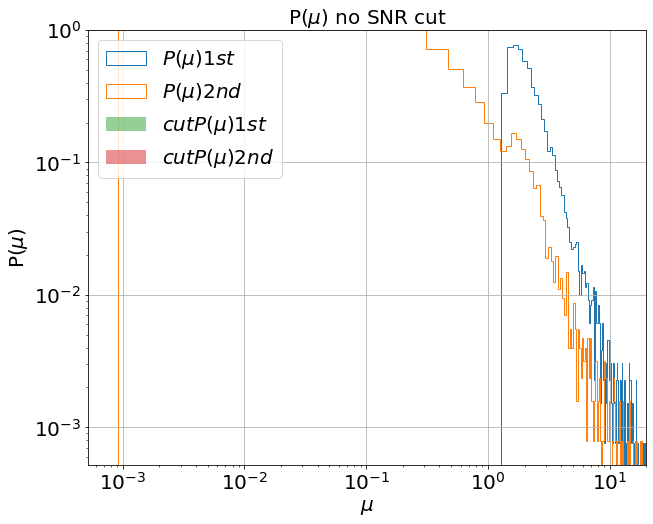

In [287]:
plt.figure(figsize=(10, 8))
hist_1st = plt.hist(abs(mu_result_1st), bins=500, density=True, histtype = 'step', label='$P(\mu) 1st$');
hist_2nd = plt.hist(abs(mu_result_2nd), bins=500, density=True, histtype = 'step', label='$P(\mu) 2nd$');

plt.hist(abs(np.transpose(mu_result_1st[np.where(np.transpose(magrho_result_aligo_1st) >= 8.)])[0]), bins=100, alpha = 0.5, density=True, label='$cut P(\mu) 1st$');
plt.hist(abs(np.transpose(mu_result_2nd[np.where(np.transpose(magrho_result_aligo_2nd) >= 8.)])[0]), bins=100, alpha = 0.5, density=True, label='$cut P(\mu) 2nd$');


plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'dP($\mu$)', fontsize=20)
plt.title(r'P($\mu$) no SNR cut', fontsize=20)

plt.grid(True)

plt.xlim(0, 20)
plt.ylim(0, 1)



(0, 1)

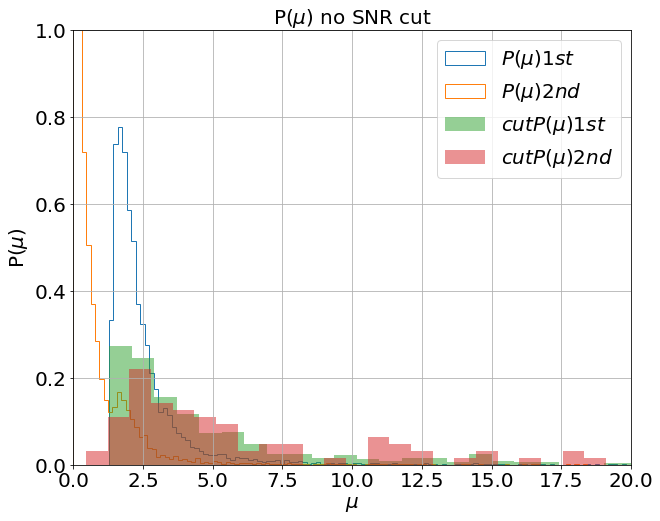

In [251]:
plt.figure(figsize=(10, 8))
hist_1st = plt.hist(abs(mu_result_1st), bins=500, density=True, histtype = 'step', label='$P(\mu) 1st$');
hist_2nd = plt.hist(abs(mu_result_2nd), bins=500, density=True, histtype = 'step', label='$P(\mu) 2nd$');

plt.hist(abs(np.transpose(mu_result_1st[np.where(np.transpose(magrho_result_1st) >= 8.)])[0]), bins=100, alpha = 0.5, density=True, label='$cut P(\mu) 1st$');
plt.hist(abs(np.transpose(mu_result_2nd[np.where(np.transpose(magrho_result_2nd) >= 8.)])[0]), bins=100, alpha = 0.5, density=True, label='$cut P(\mu) 2nd$');


#plt.xscale('log')
#plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'P($\mu$)', fontsize=20)
plt.title(r'P($\mu$) no SNR cut', fontsize=20)

plt.grid(True)

plt.xlim(0, 20)
plt.ylim(0, 1)



Text(0.5, 1.0, 'P($\\mu$) no SNR cut')

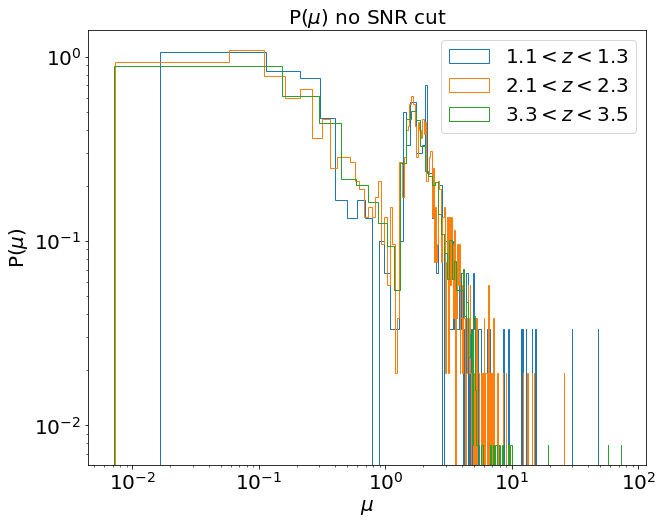

In [294]:
plt.figure(figsize=(10, 8))
source_z_list = np.array(source_z_list)
zmin = 1.1; zmax = 1.3
indz = np.where((source_z_list > zmin)*(source_z_list < zmax))
hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[indz], mu_result_2nd[indz]))), bins=500, density=True, histtype = 'step', \
                     label=str(zmin)+'$<z<$'+str(zmax));

zmin = 2.1; zmax = 2.3
indz = np.where((source_z_list > zmin)*(source_z_list < zmax))
hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[indz], mu_result_2nd[indz]))), bins=500, density=True, histtype = 'step', \
                     label=str(zmin)+'$<z<$'+str(zmax));

zmin = 3.3; zmax = 3.5
indz = np.where((source_z_list > 3.3)*(source_z_list < 3.5))
hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[indz], mu_result_2nd[indz]))), bins=500, density=True, histtype = 'step', \
                     label=str(zmin)+'$<z<$'+str(zmax));



plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'P($\mu$)', fontsize=20)
plt.title(r'P($\mu$) no SNR cut', fontsize=20)

(array([  90.,  724., 1582., 1761., 1437., 1041.,  693.,  413.,  275.,
         108.]),
 array([0.34201784, 1.03426277, 1.72650769, 2.41875262, 3.11099755,
        3.80324247, 4.4954874 , 5.18773233, 5.87997725, 6.57222218,
        7.26446711]),
 <a list of 10 Patch objects>)

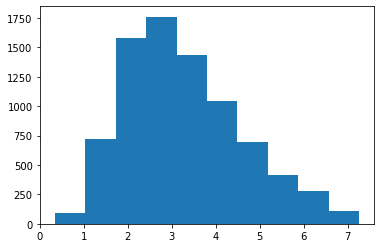

In [310]:
plt.hist(source_z_list)

Text(0.5, 1.0, 'P($\\mu$) with SNR cut')

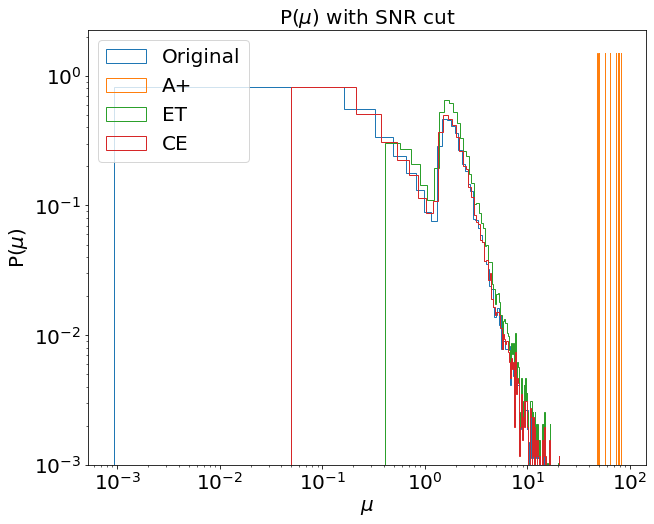

In [314]:
plt.figure(figsize=(10, 8))


plt.hist(abs(np.concatenate((mu_result_1st, mu_result_2nd))), bins=500, density=True, histtype = 'step', \
                     label='Original');

#ind_1st = np.where(np.transpose(magrho_result_aligo_1st) >= 8.)
#ind_2nd = np.where(np.transpose(magrho_result_aligo_2nd) >= 8.)
#hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[ind_1st], mu_result_2nd[ind_2nd]))), bins=500, density=True, histtype = 'step', \
#                     label='aLIGO');
#
ind_1st = np.where(np.transpose(magrho_result_aplus_1st) >= 8.)
ind_2nd = np.where(np.transpose(magrho_result_aplus_2nd) >= 8.)
hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[ind_1st], mu_result_2nd[ind_2nd]))), bins=500, density=True, histtype = 'step', \
                     label='A+');
#
ind_1st = np.where(np.transpose(magrho_result_ET_1st) >= 8.)
ind_2nd = np.where(np.transpose(magrho_result_ET_2nd) >= 8.)
hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[ind_1st], mu_result_2nd[ind_2nd]))), bins=500, density=True, histtype = 'step', \
                     label='ET');
#
ind_1st = np.where(np.transpose(magrho_result_CE_1st) >= 8.)
ind_2nd = np.where(np.transpose(magrho_result_CE_2nd) >= 8.)
hist_allz = plt.hist(abs(np.concatenate((mu_result_1st[ind_1st], mu_result_2nd[ind_2nd]))), bins=500, density=True, histtype = 'step', \
                     label='CE');


plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'P($\mu$)', fontsize=20)
plt.title(r'P($\mu$) with SNR cut', fontsize=20)

No handles with labels found to put in legend.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(0.0586818432461266, 20)

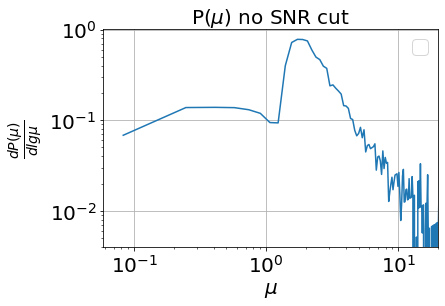

In [261]:
bins_all = ((hist_all[1][1:]+hist_all[1][0:-1])*0.5)
plt.plot(bins_all, hist_all[0]*bins_all)

plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'$\frac{dP(\mu)}{dlg \mu}$', fontsize=20)
plt.title(r'P($\mu$) no SNR cut', fontsize=20)

plt.grid(True)

plt.xlim(0, 20)
#plt.ylim(0, 1)



IndexError: index 513 is out of bounds for axis 0 with size 500

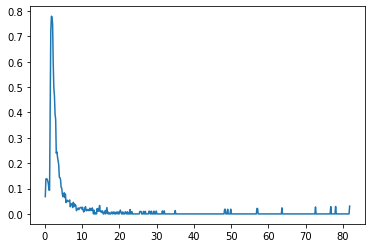

In [264]:
bins_all = ((hist_all[1][1:]+hist_all[1][0:-1])*0.5)
plt.plot(bins_all, hist_all[0]*bins_all)
plt.plot(bins_all, hist_all[0]*bins_all)

plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'P($\mu$)', fontsize=20)
plt.title(r'P($\mu$) no SNR cut', fontsize=20)

plt.grid(True)

plt.xlim(0, 20)
#plt.ylim(0, 1)



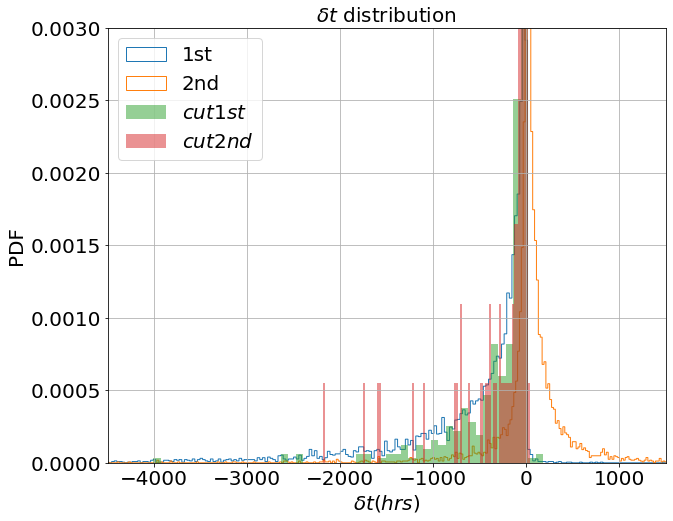

In [238]:
plt.figure(figsize=(10, 8))
plt.hist(delt_result_1st/constantfei.yr_s*365*24, bins=800, density=True, histtype = 'step', label='1st');
plt.hist(delt_result_2nd/constantfei.yr_s*365*24, bins=800, density=True, histtype = 'step', label='2nd');

plt.hist(np.transpose(delt_result_1st[np.where(np.transpose(magrho_result_1st) >= 8.)])[0]/constantfei.yr_s*365*24, bins=100, alpha = 0.5, density=True, label='$cut 1st$');
plt.hist(np.transpose(delt_result_2nd[np.where(np.transpose(magrho_result_2nd) >= 8.)])[0]/constantfei.yr_s*365*24, bins=100, alpha = 0.5, density=True, label='$cut 2nd$');


#plt.xscale('log')
#plt.yscale('log')
plt.xlim(-4500, 1500)
plt.ylim(0, 0.003)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\delta t (hrs)$', fontsize=20)
plt.ylabel(r'PDF', fontsize=20)
plt.title(r'$\delta t$ distribution', fontsize=20)

plt.grid(True)